In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import numpy as np
import re
from numpy import linalg as LA
from time import time
from scipy import sparse
import matplotlib.pyplot as plt

/home/neo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'color'
  
/home/neo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: The following kwargs were not used by contour: 'color'
  if __name__ == '__main__':
/home/neo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'color'
  # Remove the CWD from sys.path while we load stuff.
/home/neo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'color'
  # This is added back by InteractiveShellApp.init_path()


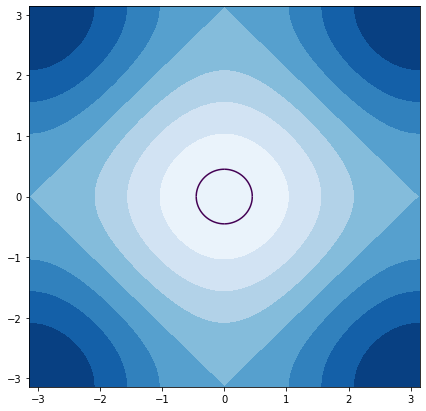

In [32]:
N=100
kx=np.linspace(0,np.pi,N)
ky=np.linspace(0,np.pi,N)
plt.rcParams['figure.figsize'] = [7,7]
Kx,Ky=np.meshgrid(kx,ky)
E=-2*(np.cos(Kx)+np.cos(Ky))
E_F=-3.8
CS=plt.contour(kx,ky,E,levels=[E_F],color='red')
plt.contour(-kx,ky,E,levels=[E_F],color='red')
plt.contour(-kx,-ky,E,levels=[E_F],color='red')
plt.contour(kx,-ky,E,levels=[E_F],color='red')
plt.contourf(kx,ky,E,cmap='Blues')
plt.contourf(-kx,ky,E,cmap='Blues')
plt.contourf(-kx,-ky,E,cmap='Blues')
plt.contourf(kx,-ky,E,cmap='Blues')
F = CS.collections[0].get_paths()[0]
coordsF = F.vertices
vF = np.dstack([2*np.sin(coordsF[:,0]),2*np.sin(coordsF[:,1])])[0]
vFmag = vF[:,0]*vF[:,0]+vF[:,1]*vF[:,1]
shatF  = vF/np.transpose([vFmag])
thetaF0 =  np.float64(np.arctan((vF[:,1]+1e-2)/(vF[:,0]+1e-2))) 
coordsFx_irr = coordsF[:,0]
coordsFy_irr = coordsF[:,1]
Lambda0=np.pi/(np.sqrt(2))
steps=30000 #30000
eps=(1-1/(N*N)) #0.9999
lambdaF=Lambda0*eps**np.linspace(0,steps-1,steps)
ThetaF,LambdaF=np.meshgrid(thetaF0,lambdaF)
Fwvfx_out = coordsFx_irr+LambdaF*np.cos(ThetaF)
Fwvfy_out = coordsFy_irr+LambdaF*np.sin(ThetaF)
EFwvf=-2*(np.cos(Fwvfx_out)+np.cos(Fwvfy_out))

In [33]:
EFwvfAvg=np.sum(EFwvf,axis=1)/len(thetaF0)

In [34]:
EFwvfAvg

array([ 0.5433019 ,  0.54289476,  0.54248759, ..., -3.69194169,
       -3.69195361, -3.69196553])

In [7]:
J0=1/(N*N)#1.19e9/(N*N)#5e-3/(N*N)
J=np.zeros(steps)
J[0]=J0
omega=4 #1/2 of bandwidth in 2D

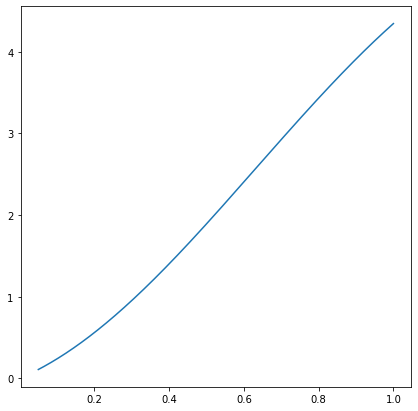

In [35]:
plt.plot(lambdaF/Lambda0,EFwvfAvg-E_F)

In [143]:
k=0
for i in range(len(lambdaF)-1):
    Ek=EFwvfAvg[i]-E_F
    if(Ek-J[0]/4>0):
        if(Ek-J[i]/4>0):

            J[i+1]=J[i]+2*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*(Ek)
        else:
            J[i:]=4*Ek
            k=i
            break
    else:
        if(Ek-J[i]/4<0):

            J[i+1]=J[i]+2*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*(Ek)
        else:
            J[i:]=4*Ek
            k=i
            break
    

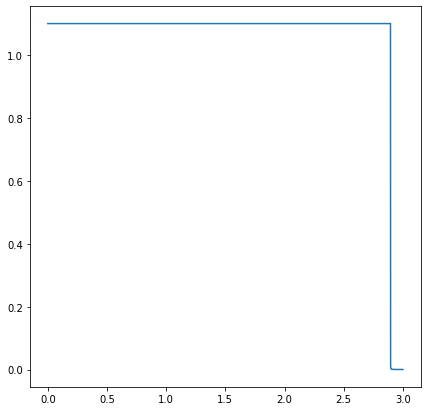

In [144]:
plt.plot(-np.log(lambdaF/Lambda0),J[::-1])

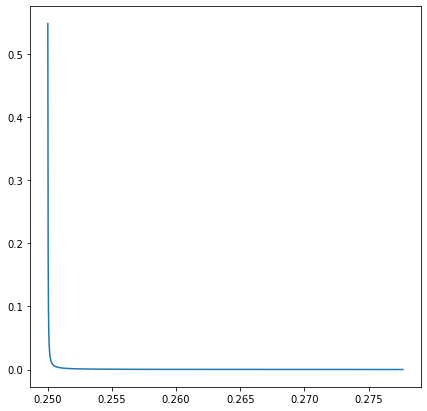

In [164]:
figure,ax=plt.subplots(1)
ax.plot(lambdaF[0:1051],J[0:1051])

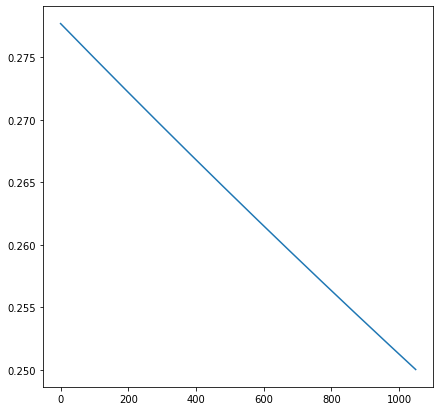

In [153]:
plt.plot(lambdaF[0:1050])

## $Regime-1: J_{0}= 5\times 10^{-3}t$ to $7\times 10^{-3}t$

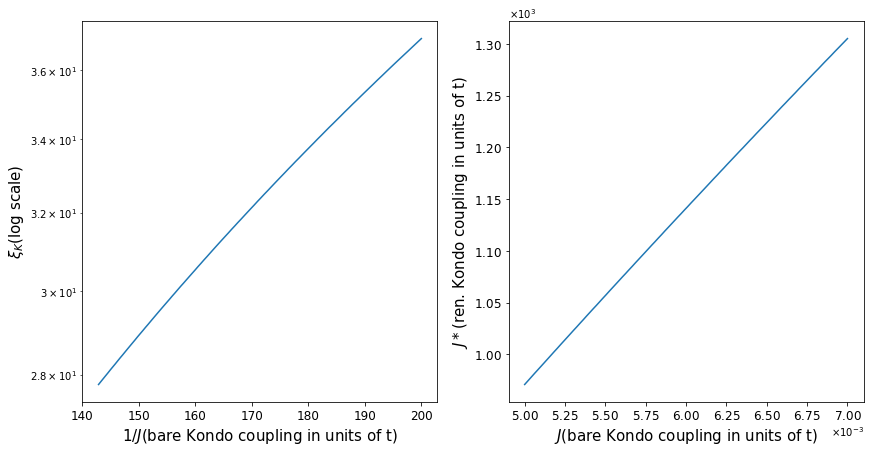

In [33]:
J0arr=np.linspace(5e-3,7e-3,100)
LambdaFParr=0.0*J0arr
JfixedArr=0.0*J0arr
omega=0.0
for J_0 in J0arr:
    J=np.zeros(steps)
    J[0]=J_0/(N*N)
    k=0
    for i in range(len(lambdaF)-1):
        Ek=EFwvfAvg[i]-E_F
        if(Ek-J[0]/4>0):
            if(Ek-J[i]/4.>0):
                J[i+1]=J[i]+4*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*Ek
            else:
                JfixedArr[J0arr==J_0]=4*Ek
                k=i
                J[i:]=4*Ek
                break
        else:
            if(Ek-J[i]/4<0):

                J[i+1]=J[i]+2*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*(Ek)
            else:
                JfixedArr[J0arr==J_0]=4*Ek
                k=i
                J[i:]=4*Ek
                break  
    LambdaFParr[J0arr==J_0]=lambdaF[k]/Lambda0            

figure,ax=plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [14,7]
ax[0].set_yscale('log')
ax[0].plot(1/J0arr,1/(LambdaFParr*Lambda0),label='URG')
ax[0].tick_params(labelsize='large')
ax[0].set_xlabel(r'$1/J$(bare Kondo coupling in units of t)',fontsize=15)
ax[0].set_ylabel(r'$\xi_{K}$(log scale)',fontsize=15)
ax[1].ticklabel_format(style='sci',useMathText=True,scilimits=(1,2))
ax[1].tick_params(labelsize='large')
ax[1].plot(J0arr,JfixedArr*N*N,label='URG')
ax[1].set_xlabel(r'$J$(bare Kondo coupling in units of t)',fontsize=15)
ax[1].set_ylabel(r'$J*$(ren. Kondo coupling in units of t)',fontsize=15)
plt.savefig('KondoRegime1.png')

## $Regime-2: J_{0}= 7\times 10^{-3}t$ to $t$

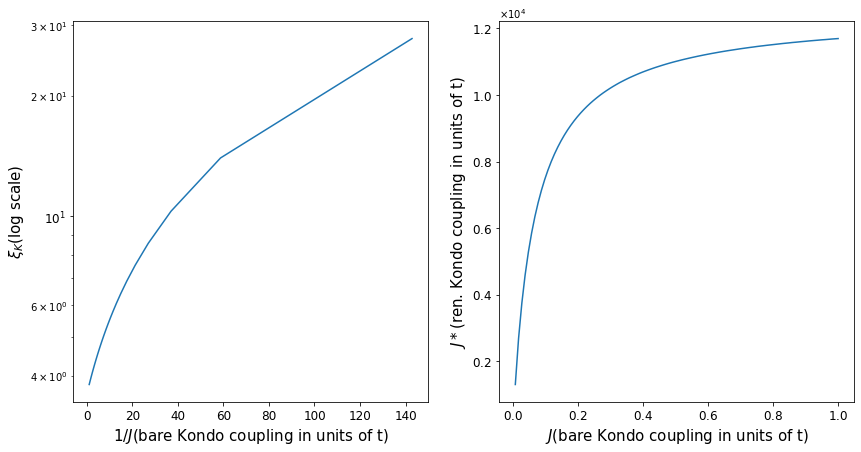

In [450]:
J0arr=np.linspace(7e-3,1,100)
LambdaFParr=0.0*J0arr
JfixedArr=0.0*J0arr
omega=0.0
for J_0 in J0arr:
    J=np.zeros(steps)
    J[0]=J_0/(N*N)
    k=0
    for i in range(len(lambdaF)-1):
        Ek=EFwvfAvg[i]-E_F
        if(Ek-J[0]/4>0):
            if(Ek-J[i]/4.>0):
                J[i+1]=J[i]+4*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*Ek
            else:
                JfixedArr[J0arr==J_0]=4*Ek
                k=i
                J[i:]=4*Ek
                break
        else:
            if(Ek-J[i]/4<0):

                J[i+1]=J[i]+2*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*(Ek)
            else:
                JfixedArr[J0arr==J_0]=4*Ek
                k=i
                J[i:]=4*Ek
                break  
    LambdaFParr[J0arr==J_0]=lambdaF[k]/Lambda0            

figure,ax=plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [14,7]
ax[0].set_yscale('log')
ax[0].plot(1/J0arr,1/(LambdaFParr*Lambda0),label='URG')
ax[0].tick_params(labelsize='large')
ax[0].set_xlabel(r'$1/J$(bare Kondo coupling in units of t)',fontsize=15)
ax[0].set_ylabel(r'$\xi_{K}$(log scale)',fontsize=15)
ax[1].ticklabel_format(style='sci',useMathText=True,scilimits=(1,2))
ax[1].tick_params(labelsize='large')
ax[1].plot(J0arr,JfixedArr*N*N,label='URG')
ax[1].set_xlabel(r'$J$(bare Kondo coupling in units of t)',fontsize=15)
ax[1].set_ylabel(r'$J*$(ren. Kondo coupling in units of t)',fontsize=15)
plt.savefig('KondoRegime2.svg')

## $Regime-3: J_{0}= t$ to $10t$

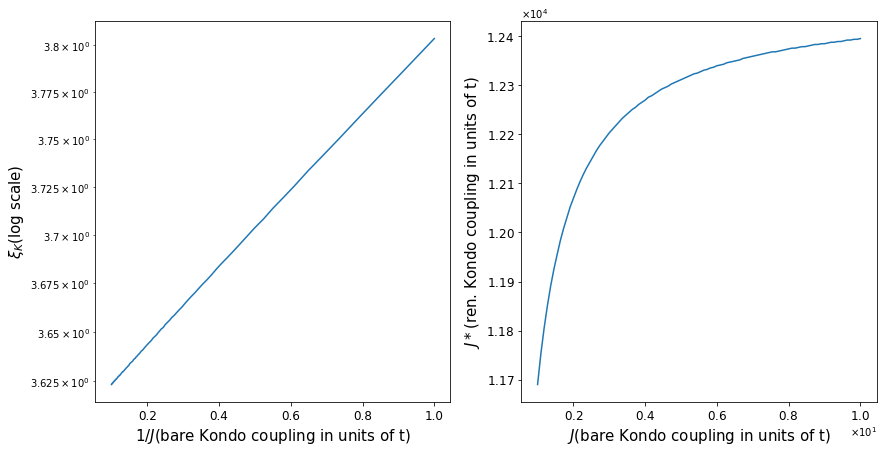

In [452]:
J0arr=np.linspace(1,10,100)
LambdaFParr=0.0*J0arr
JfixedArr=0.0*J0arr
omega=0.0
for J_0 in J0arr:
    J=np.zeros(steps)
    J[0]=J_0/(N*N)
    k=0
    for i in range(len(lambdaF)-1):
        Ek=EFwvfAvg[i]-E_F
        if(Ek-J[0]/4>0):
            if(Ek-J[i]/4.>0):
                J[i+1]=J[i]+4*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*Ek
            else:
                JfixedArr[J0arr==J_0]=4*Ek
                k=i
                J[i:]=4*Ek
                break
        else:
            if(Ek-J[i]/4<0):

                J[i+1]=J[i]+2*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*(Ek)
            else:
                JfixedArr[J0arr==J_0]=4*Ek
                k=i
                J[i:]=4*Ek
                break  
    LambdaFParr[J0arr==J_0]=lambdaF[k]/Lambda0            
#J0arr=np.linspace(7e-3,1,100)
figure,ax=plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [14,7]
ax[0].set_yscale('log')
ax[0].plot(1/J0arr,1/(LambdaFParr*Lambda0),label='URG')
ax[0].tick_params(labelsize='large')
ax[0].set_xlabel(r'$1/J$(bare Kondo coupling in units of t)',fontsize=15)
ax[0].set_ylabel(r'$\xi_{K}$(log scale)',fontsize=15)
ax[1].ticklabel_format(style='sci',useMathText=True,scilimits=(1,2))
ax[1].tick_params(labelsize='large')
ax[1].plot(J0arr,JfixedArr*N*N,label='URG')
ax[1].set_xlabel(r'$J$(bare Kondo coupling in units of t)',fontsize=15)
ax[1].set_ylabel(r'$J*$(ren. Kondo coupling in units of t)',fontsize=15)
plt.savefig('KondoRegime3.svg')

In [44]:
np.linspace(0,6,7)

array([0., 1., 2., 3., 4., 5., 6.])

In [171]:
4.9*10**(-3)*1.02656**820

10601154.997503908

In [48]:
np.zeros([7,len(J0arr)])[:,0]

array([0., 0., 0., 0., 0., 0., 0.])

In [6]:
from tqdm import tqdm
#URG
factor=10**np.linspace(0,6,7)
J0arr=4.9e-3*(1.02656)**np.linspace(1,800,800)#np.concatenate([np.concatenate([np.linspace(5e-3,1,100),np.linspace(1.1,0.9e8,1000)]),np.linspace(1e8,1.15e9,10000)])
LambdaFParr=np.zeros([7,len(J0arr)])
JfixedArr=np.zeros([7,len(J0arr)])
omega=0.0
Jmax=np.zeros(7)
for f in range(len(factor)):
    for J_0 in tqdm(J0arr):
        #print(np.where(J0arr==J_0))
        J=np.zeros(steps)
        J[0]=J_0/(N*N)
        k=0
        for i in range(len(lambdaF)-1):
            Ek=(EFwvfAvg[i]-E_F)*factor[f]
            if(Ek-J[0]/4>0):
                if(Ek-J[i]/4.>0):
                    J[i+1]=J[i]+4*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*Ek
                else:
                    JfixedArr[f][J0arr==J_0]=4*Ek
                    k=i
                    J[i:]=4*Ek
                    break
            else:
                if(Ek-J[i]/4<0):

                    J[i+1]=J[i]+2*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*(Ek)
                else:
                    JfixedArr[f][J0arr==J_0]=4*Ek
                    k=i
                    J[i:]=4*Ek
                    break       

        LambdaFParr[f][J0arr==J_0]=lambdaF[k]/Lambda0        

100%|██████████| 800/800 [01:34<00:00,  8.44it/s] 


In [79]:
JfixedMax=np.asarray([JfixedArr[f].max() for f in range(len(factor))])*N*N

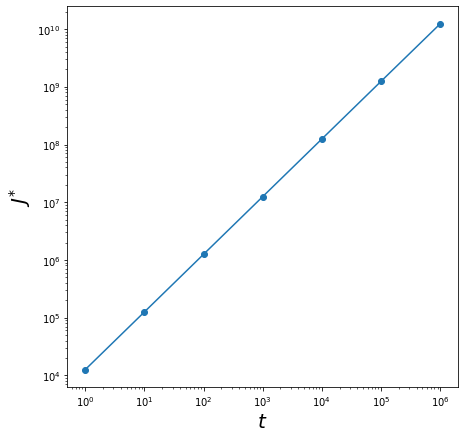

In [129]:
figure,ax=plt.subplots(1)
plt.rcParams['figure.figsize'] = [7,7]
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(factor,JfixedMax,marker='o')
ax.set_xlabel(r'$t$',fontsize=20)
ax.set_ylabel(r'$J^{*}$',fontsize=20)
plt.savefig('KondoCouplingVst.svg')

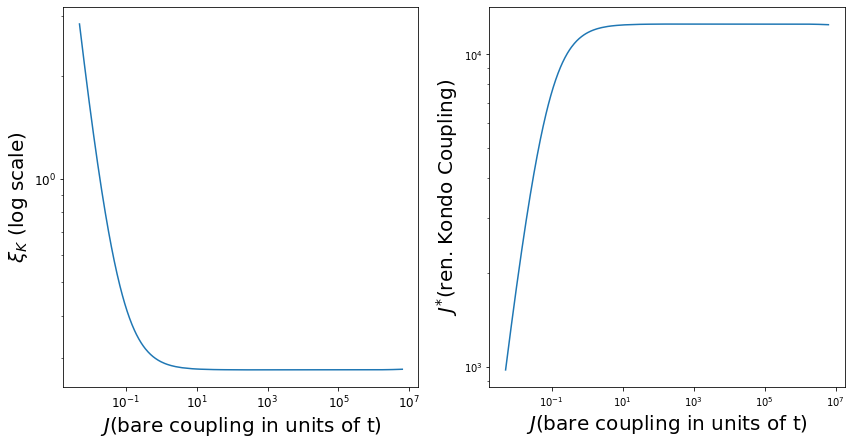

In [11]:
figure,ax=plt.subplots(1,2)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
plt.rcParams['figure.figsize'] = [14,7]
ax[0].plot(J0arr,1/(LambdaFParr[0]/Lambda0),label='URG')
ax[0].tick_params(labelsize='large')
ax[0].set_xlabel(r'$J$(bare coupling in units of t)',fontsize=20)
ax[0].set_ylabel(r'$\xi_{K}~$(log scale)',fontsize=20)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].plot(J0arr,JfixedArr[0]*N*N,label='URG')
#ax[1].plot(J0arr[0:820],JfixedArr[0:820]*N*N,label='URG')
#plt.rcParams['figure.figsize'] = [14,7]
ax[1].set_xlabel(r'$J$(bare coupling in units of t)',fontsize=20)
ax[1].set_ylabel(r'$J^{*}$(ren. Kondo Coupling)',fontsize=20)
plt.savefig('KondoComplete.svg')

In [729]:
J=np.zeros(steps)
J_0=20
J[0]=J_0/(N*N)
k=0
for i in range(len(lambdaF)-1):
    Ek=(EFwvfAvg[i]-E_F)
    if(Ek-J[0]/4>0):
        if(Ek-J[i]/4.>0):
            J[i+1]=J[i]+4*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*Ek
        else:
            Jfixed=4*Ek
            k=i
            J[i:]=4*Ek
            break
    else:
        if(Ek-J[i]/4<0):
            J[i+1]=J[i]+2*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*(Ek)
        else:
            Jfixed=4*Ek
            k=i
            J[i:]=4*Ek
            break       
        

In [732]:
J[k]

16.738797816125086

In [730]:
Jfixed,k

(16.738797816125086, 387)

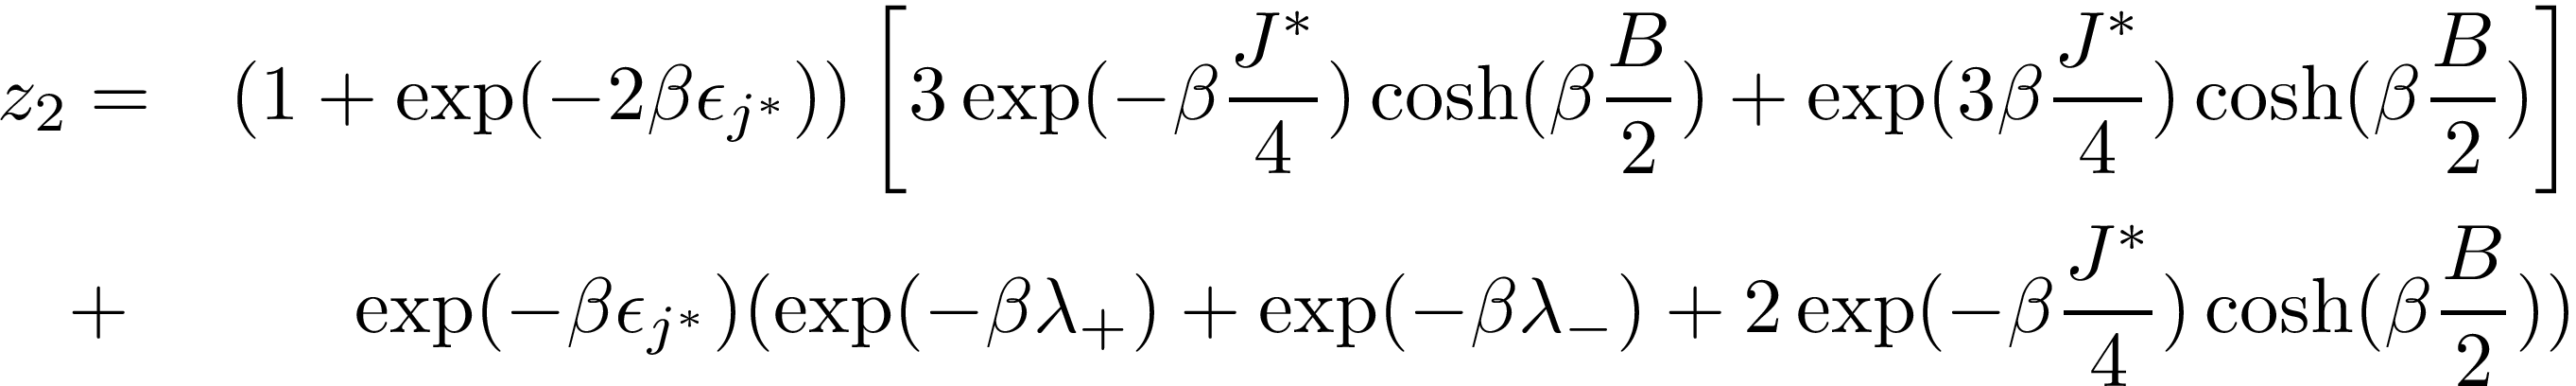

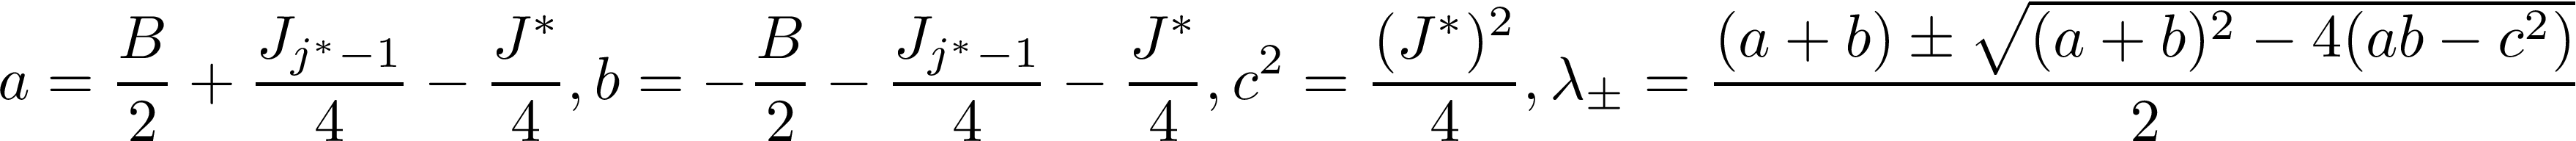

In [872]:
'''
B=np.linspace(1e-5,1e-2,3000)#magnetic field
Temp=np.linspace(1e-2,1,10000)#in kelvin
Jstar=Jfixed#magnitude of Kondo coupling at IR fixed point
Ekstar=EFwvfAvg[k]-E_F#magnitude of the dispersion for the boundary shell of the Kondo cloud
Bmesh,Tmesh=np.meshgrid(B,Temp)
kB=1
a=Bmesh/2.-Jstar/4#B/2.+J[k-2]/4-Jstar/4
b=-Bmesh/2.-Jstar/4#-B/2.-J[k-2]/4-Jstar/4#net magnitude of the polarizing field emerging from external magnetic field and the decoupled local Fermi liquid
c=Jstar/2.
E1=0.5*(a+b+np.sqrt((a-b)**2+4*c**2))
E2=0.5*(a+b-np.sqrt((a-b)**2+4*c**2))
'''
B=np.linspace(1e-3,2e-3,50)
Temp=np.linspace(0.008,20,10000)#np.linspace(0.008,5,10000)
kB=1
Jstar=Jfixed
Bmesh,Tmesh=np.meshgrid(B,Temp)
a=Bmesh/2.+J[k-20]/4-Jstar/4.
b=-Bmesh/2.-J[k-20]/4-Jstar/4.
c=Jfixed/2.
E1=0.5*(a+b+np.sqrt((a-b)**2+4*c**2))
E2=0.5*(a+b-np.sqrt((a-b)**2+4*c**2))

In [873]:
Tk=(EFwvfAvg-E_F).max()*lambdaF[k]/Lambda0

In [874]:
Tk

4.1784189388452875

In [875]:
Z=np.exp(-E1/(kB*Tmesh))+np.exp(-E2/(kB*Tmesh))+2*np.exp(-(Jstar/4)/(kB*Tmesh))*np.cosh(Bmesh/(2*kB*Tmesh))

In [876]:
magnetization=kB*Tmesh*(np.gradient(Z,B,axis=1)/Z)

In [877]:
susceptibility=np.gradient(magnetization,B,axis=1)

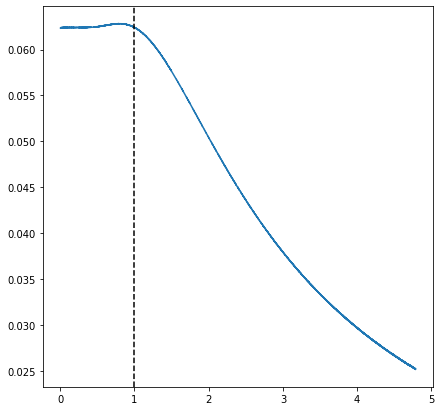

In [881]:
figure,ax=plt.subplots(1)
plt.rcParams['figure.figsize'] = [7,7]
#ax.set_yscale('log')
#ax.plot(Temp/Tk,magnetization[:,0])
ax.plot(Temp/Tk,(susceptibility[:,0]*Tk))
ax.axvline(x=1,linestyle='--',color='k')

In [180]:
#Computing Specific heat

In [463]:
b=(2-0.2)/10000
(4-0.2)*(1/b)

21111.11111111111

In [464]:
#Temp=np.linspace(0.2,4,20000)
Temp=np.linspace(0.0005,5,40000)#np.linspace(0.0005,5,20000)#np.linspace(0.0005,5,900000)
a=+J[k-20]/4-Jstar/4.
b=-J[k-20]/4-Jstar/4.
c=Jfixed/2.
Ekstar=EFwvfAvg[k]-E_F
E1=0.5*(a+b+np.sqrt((a-b)**2+4*c**2))
E2=0.5*(a+b-np.sqrt((a-b)**2+4*c**2))
Z=(np.exp(-E1/(kB*Temp))+np.exp(-E2/(kB*Temp))+2*np.exp(-(Jstar/4)/(kB*Temp)))#np.exp(-Ekstar/(kB*Temp))*(np.exp(-E1/(kB*Temp))+np.exp(-E2/(kB*Temp))+2*np.exp(-(Jstar/4)/(kB*Temp)))
#+(1+np.exp(-2*Ekstar/(kB*Temp)))*(3*np.exp(-(Jstar/4)/(kB*Temp))+np.exp(-(3*Jstar/4.)/(kB*Temp)))#partition function at zero magnetic field

In [465]:
Z_0=np.exp(-(EFwvfAvg[k]-E_F)/(kB*Temp))+1+np.exp(-2*(EFwvfAvg[k]-E_F)/(kB*Temp))

In [466]:
C0=np.gradient(Temp*Temp*np.gradient(np.log(Z_0),Temp),Temp)

In [467]:
C0

array([0.        , 0.        , 0.        , ..., 0.3372453 , 0.46159343,
       0.58594736])

In [468]:
C=np.gradient(Temp*Temp*np.gradient(np.log(Z),Temp),Temp)

/home/neo/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:1084: RuntimeWarning: invalid value encountered in double_scalars
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0


In [470]:
[print(C[i]) for i in range(len(C))]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
inf
0.06728712488984456
0.0659043841296807
0.06455927308707032
0.06325052263855468
0.06197690964472713
0.06073726033355342
0.05953045521164313
0.05835541319538606
0.05721109276782954
0.056096497224643826
0.055010669864714146
0.05395268619759008
0.05292166009894572
0.05191674062371021
0.05093710347864544
0.049981957527052145
0.049050545967475045
0.04814213446661597
0.04725601779500721
0.046391516632866114
0.04554797199671157
0.04472475696093

2.955901436507702e-06
2.9344300855882466e-06
2.982844307553023e-06
2.9782240744680166e-06
2.918495738413185e-06
2.93805351248011e-06
2.9742150218226016e-06
2.964196028187871e-06
2.920845872722566e-06
2.933054929599166e-06
2.9528819140978158e-06
2.947577740997076e-06
2.929802576545626e-06
2.9427537810988724e-06
2.938060788437724e-06
2.913177013397217e-06
2.92615732178092e-06
2.9133661882951856e-06
2.9176590032875538e-06
2.9361763154156506e-06
2.935325028374791e-06
2.9120856197550893e-06
2.9244620236568153e-06
2.9080547392368317e-06
2.9056245693936944e-06
2.898465027101338e-06
2.913933712989092e-06
2.9178409022279084e-06
2.860826498363167e-06
2.907865564338863e-06
2.9327566153369844e-06
2.88570299744606e-06
2.8857539291493595e-06
2.8829890652559698e-06
2.8889990062452853e-06
2.8843714972026646e-06
2.880573447328061e-06
2.9042421374469995e-06
2.874316123779863e-06
2.8481226763688028e-06
2.8985741664655507e-06
2.9288275982253253e-06
2.8727372409775853e-06
2.818378561642021e-06
2.8539943741

2.6016765332315117e-05
2.606583439046517e-05
2.6082016120199114e-05
2.6176836399827152e-05
2.624563785502687e-05
2.631889219628647e-05
2.6372901629656553e-05
2.6330046239309013e-05
2.635586861288175e-05
2.648092049639672e-05
2.6600428100209683e-05
2.6609530323185027e-05
2.6646957849152386e-05
2.666188811417669e-05
2.6711946702562273e-05
2.6827612600754946e-05
2.687689266167581e-05
2.6890156732406467e-05
2.6870809961110353e-05
2.6984977012034506e-05
2.7127593057230115e-05
2.7112131647299975e-05
2.7131871320307255e-05
2.7244503144174814e-05
2.7317728381603956e-05
2.7273359592072666e-05
2.7304922696202993e-05
2.744297671597451e-05
2.7527967176865786e-05
2.7563146431930363e-05
2.7579095331020653e-05
2.7606314688455313e-05
2.770267747109756e-05
2.7789879823103547e-05
2.781691000564024e-05
2.7814225177280605e-05
2.7921465516556054e-05
2.797847264446318e-05
2.798869536491111e-05
2.809164288919419e-05
2.812722959788516e-05
2.8180511435493827e-05
2.822763053700328e-05
2.8299175028223544e-05
2.8

0.0027581294198171236
0.0027606189396465197
0.002762993681244552
0.0027653685392579064
0.0027678014230332337
0.002770350249193143
0.002772730149445124
0.002775170411041472
0.002777786081423983
0.002780177950626239
0.0027825753059005365
0.0027852076600538567
0.002787675512081478
0.0027899795895791613
0.0027924638270633295
0.0027949573850492015
0.0027974610493401997
0.0027999756057397462
0.002802387301926501
0.0028049258908140473
0.0028074203510186635
0.0028099287883378565
0.0028124518794356845
0.002814761217450723
0.0028172586316941306
0.002819887660734821
0.002822362475853879
0.0028247984446352348
0.002827368334692437
0.0028299008918111213
0.002832339538144879
0.0028347422703518532
0.0028372246379149146
0.0028399023140082136
0.0028424316333257593
0.0028447558215702884
0.002847277581167873
0.002849940341548063
0.0028524576846393757
0.0028548877162393183
0.0028573460585903376
0.0028600060250028037
0.0028625234408536926
0.002864899011910893
0.0028675935172941536
0.0028700901530100964
0.00

0.02470734501548577
0.024719543078390416
0.024731809404329397
0.024744382666540332
0.024756690851063468
0.024768972645688336
0.024781466992862988
0.024793792334094178
0.024806092165817972
0.024818653117108624
0.024830998161633033
0.024843366212735418
0.024855805313563906
0.024868172469723504
0.024880515717086382
0.024892978624848183
0.024905561542254873
0.024917930219089612
0.024930180465162266
0.02494264711276628
0.02495523491234053
0.024967657278466504
0.024979962239740416
0.024992436985485256
0.025005034054629505
0.02501741881860653
0.025029830787389074
0.02504246159514878
0.025054880847164895
0.02506718446238665
0.025079707862460054
0.025092259798839223
0.02510474479640834
0.025117258926911745
0.025129754554654937
0.02514227982464945
0.025154787123028655
0.025167180843709502
0.025179700904118363
0.02519234759529354
0.025204785641108174
0.025217302929377183
0.02522994773607934
0.02524238460318884
0.025254949534428306
0.025267546872782987
0.02527998500590911
0.025292600053944625
0.02

0.09935626148217125
0.099386292960844
0.09941592155519174
0.09944551889202558
0.09947508481855039
0.09950424807175295
0.09953427207074128
0.09956404214608483
0.0995932611040189
0.09962326710956404
0.09965294506400824
0.09968229518563021
0.09971206096088281
0.09974164776213001
0.09977142757270485
0.09980102848203387
0.09983045063563623
0.09986043821118074
0.09989009839046048
0.09991965456720209
0.09994940440810751
0.09997905045747757
0.10000889057118911
0.1000384036306059
0.10006818546389695
0.10009801280830288
0.10012728990113828
0.10015728310827399
0.10018717312050285
0.10021666216198355
0.10024671887367731
0.1002763001160929
0.10030585314962082
0.10033582528558327
0.10036547123308992
0.10039523844170617
0.10042497776885284
0.10045461490517482
0.10048474656650797
0.10051440323150018
0.10054373414459405
0.10057400767982472
0.10060395563778002
0.10063342895591632
0.10066324836952845
0.10069296635629144
0.10072288162336918
0.100752770267718
0.1007824084663298
0.100812468364893
0.10084235

0.25832806940888986
0.2583740493428195
0.25841936580400215
0.2584658122432302
0.25851159512239974
0.2585573872420355
0.25860352482413873
0.25864922317123273
0.2586953794088913
0.2587414328518207
0.2587871592040756
0.2588331193619524
0.2588788645443856
0.2589249559532618
0.25897105688636657
0.25901671865722165
0.25906283900985727
0.2591086323518539
0.2591544354945654
0.2592009220679756
0.25924674489942845
0.25929269007610856
0.2593385328000295
0.25938416101416806
0.25943092240049737
0.25947668309527216
0.25952211700496264
0.25956857214623597
0.25961436345096445
0.25966027755930554
0.259706539043691
0.25975236152589787
0.2597985316897393
0.25984448755480116
0.25989011674391804
0.2599364311390673
0.25998253127909265
0.2600284173968248
0.2600744266528636
0.26011999688489595
0.26016659025481204
0.2602127446371014
0.2602581226165057
0.26030463658389635
0.2603505990555277
0.2603963477013167
0.2604426700709155
0.26048855354019906
0.2605347860007896
0.2605808046209859
0.26062660948809935
0.2606

0.40040195962501457
0.4004520397138549
0.4005030465996242
0.40055397655669367
0.4006046145732398
0.400655606026703
0.4007059468640364
0.40075664124742616
0.40080733049398987
0.4008578712819144
0.4009091245025047
0.4009597270123777
0.4010101093517733
0.40106106083112536
0.40111164856352843
0.40116251858125906
0.40121331194677623
0.4012635980689083
0.4013147408622899
0.4013656635361258
0.40141593536827713
0.4014668487216113
0.4015173983134446
0.40156823062716285
0.40161934556090273
0.4016695940808859
0.4017204127085279
0.4017711549095111
0.40182160528638633
0.4018728415903752
0.40192349861899856
0.40197407948289765
0.4020249433160643
0.40207529974577483
0.40212637067452306
0.40217714977188734
0.402227493301325
0.4022786234418163
0.4023293898862903
0.40238015225622803
0.4024307665749802
0.40248101722681895
0.40253219877922675
0.4025829446836724
0.402633614721708
0.4026847123968764
0.4027349427342415
0.40278574478725204
0.4028367587379762
0.4028871931732283
0.4029382715016254
0.40298905810

0.605501707905205
0.6055499630965642
0.6055974438349949
0.6056457981758285
0.6056937657413073
0.605741346560535
0.6057897042410332
0.6058374811618705
0.6058855502487859
0.605933717401058
0.6059813038082211
0.6060296674259007
0.606077547177847
0.6061249430640601
0.6061733104070299
0.6062213878904004
0.6062694667489268
0.6063172556750942
0.6063648518320406
0.6064132257306483
0.6064611156471074
0.6065088127725176
0.6065569966740441
0.6066049877554178
0.6066529802992591
0.6067008770987741
0.6067483869192074
0.6067965779366205
0.6068447704019491
0.6068923816419556
0.6069404800291522
0.6069883855961962
0.6070362927566748
0.607084395691345
0.6071318201138638
0.6071800234130933
0.6072283254397917
0.6072757545334753
0.6073237683303887
0.6073717837061849
0.6074196064291755
0.6074675279305666
0.6075154511490837
0.607563570527418
0.607611302715668
0.6076589393705945
0.6077072584594134
0.6077549958135933
0.6078026377581409
0.6078509621875128
0.6078987049331772
0.6079465467846603
0.6079944876983063


0.7429738879436627
0.7430147319173557
0.743055503211508
0.7430962019279832
0.7431373019353487
0.7431777369783958
0.7432189289320377
0.743259929738997
0.7433002655525343
0.7433411212696228
0.7433816674092668
0.7434229707359918
0.7434639644416166
0.7435042929500923
0.7435450230696006
0.7435856806623633
0.7436272143022506
0.7436678454250796
0.7437078112125164
0.7437490087977494
0.7437900153672672
0.7438304750830866
0.7438715739990585
0.7439123631411348
0.7439526054004091
0.7439936055234284
0.7440342959380359
0.7440752699039876
0.744116052708705
0.7441566444904311
0.7441975197943975
0.7442379666754277
0.7442790532513754
0.744319830009772
0.7443601783015765
0.7444010476465337
0.7444418446466443
0.7444823318219278
0.7445235777340713
0.7445640388104948
0.7446044276075554
0.7446456938996562
0.7446859378906083
0.744727059660363
0.7447677527015912
0.7448080171670881
0.7448489218804752
0.7448895167326555
0.7449303957109805
0.7449710835207952
0.7450118178749108
0.7450524799205596
0.745092832010414

0.8779008339261054
0.8779296632637852
0.8779590322301374
0.8779887925629737
0.8780174606654327
0.8780465201270999
0.8780759709698032
0.8781047745942487
0.8781341180947493
0.878163111032336
0.8781920502733556
0.8782213810263784
0.8782502128597116
0.8782792878264445
0.8783090513534262
0.8783377220170223
0.8783664874790702
0.8783959415159188
0.8784245995630044
0.8784542433277238
0.8784833879253711
0.8785120334068779
0.878541367710568
0.87857020283991
0.8785994299250888
0.8786287518232712
0.8786574259502231
0.8786863435234409
0.8787155045647523
0.8787449091396411
0.8787741115011158
0.8788026659312891
0.8788313152763294
0.878860653960146
0.8788899390419829
0.8789194678683998
0.8789481999265263
0.8789764324901626
0.8790058004742605
0.8790351148927584
0.879064375825692
0.8790929884562502
0.8791216961617465
0.8791510936644045
0.8791801402476267
0.8792091333089047
0.8792379240403534
0.8792669586400734
0.8792960883947671
0.8793250158923911
0.8793538898171391
0.8793830077338498
0.8794119232843514

0.9665069921466056
0.9665245008800412
0.9665412424947135
0.966558850115689
0.9665762348886346
0.9665932154675829
0.9666105176584097
0.9666277785800048
0.9666449981814367
0.9666625395766459
0.9666798580947216
0.9666967722878326
0.9667143713668338
0.9667312029268942
0.9667489010826102
0.9667665579036111
0.9667830840262468
0.9668004767518141
0.9668172833917197
0.9668345936224796
0.9668525890156161
0.9668696350927348
0.966886639893346
0.9669039666987373
0.9669207072802237
0.9669386783134541
0.9669560630063643
0.9669721347599989
0.9669898003776325
0.9670074247769662
0.9670246446185047
0.9670416414373904
0.9670587787622935
0.9670762383248075
0.9670927479019156
0.9671104885928798
0.9671281880146125
0.9671445738567854
0.9671618273423519
0.9671792214066954
0.9671960288396804
0.9672138860041741
0.9672309746019891
0.967247112916084
0.9672650283027906
0.9672825388624915
0.9672998264795751
0.9673165272106417
0.9673330048462958
0.9673507144325413
0.9673680190971936
-0.3701496638022945
-1.70767562497

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

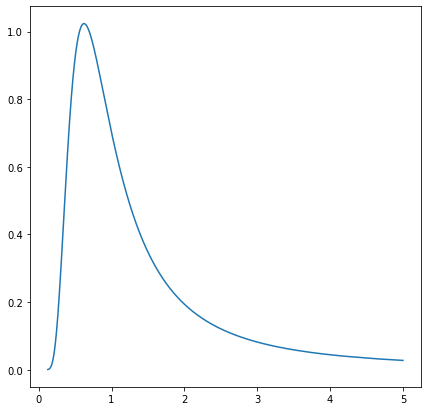

In [188]:
plt.plot(Temp[1000:-2],C[1000:-2])

In [189]:
C

array([        nan,         nan,         nan, ...,  0.02736189,
        0.00777702, -0.01180685])

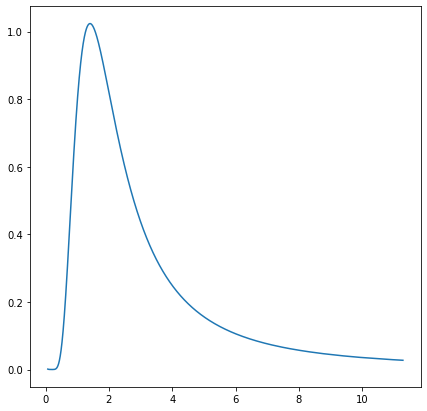

In [190]:
#plt.plot(Temp[3:-2]/Tk,C0[3:-2])
plt.plot(Temp[250:-2]/Tk,C[250:-2])

In [191]:
#Computing Wilson's ratio
B=np.linspace(1e-3,2e-3,50)
Temp=np.linspace(0.0005,5,40000)
kB=1
Jstar=Jfixed
Bmesh,Tmesh=np.meshgrid(B,Temp)
a=Bmesh/2.+J[k-20]/4-Jstar/4.
b=-Bmesh/2.-J[k-20]/4-Jstar/4.
c=Jstar/2.
E1=0.5*(a+b+np.sqrt((a-b)**2+4*c**2))
E2=0.5*(a+b-np.sqrt((a-b)**2+4*c**2))
Z=np.exp(-E1/(kB*Tmesh))+np.exp(-E2/(kB*Tmesh))+2*np.exp(-(Jstar/4)/(kB*Tmesh))*np.cosh(Bmesh/(2*kB*Tmesh))
magnetization=kB*Tmesh*(np.gradient(Z,B,axis=1)/Z)
Chi=np.gradient(magnetization,B,axis=1)[:,0]


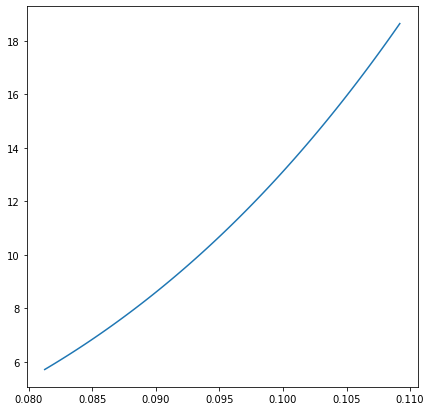

In [195]:
figure,ax=plt.subplots()
#ax.set_yscale('log')
R=(Temp[4:-2][280:-2]*Chi[4:-2][280:-2])/(C[4:-2][280:-2])

plt.plot((Temp[4:-2][280:-2]/Tk)[0:100],R[0:100])

In [196]:
R

array([5.71675397, 5.79657928, 5.87721061, ..., 4.54126829, 4.54158088,
       4.54173283])

In [197]:
R

array([5.71675397, 5.79657928, 5.87721061, ..., 4.54126829, 4.54158088,
       4.54173283])

$H=J\mathbf{S}\cdot\mathbf{s}+BS^{z}$

In [258]:
J=Jstar
B=np.linspace(5e-5,1e-1,5000)
Temp=np.linspace(8e-3,1,10000)
kB=1
Bmesh,Tmesh=np.meshgrid(B,Temp)
a=Bmesh/2.-J/4.
b=-Bmesh/2.-J/4.
c=J/2.
E1=0.5*(a+b+np.sqrt((a-b)**2+4*c**2))
E2=0.5*(a+b-np.sqrt((a-b)**2+4*c**2))
Bmesh,Tmesh=np.meshgrid(B,Temp)
#cosTheta=Bmesh/np.sqrt(Bmesh**2+J**2/4.)
#ExpSz1=cosTheta
#ExpSz2=-cosTheta

In [ ]:
Z=2*np.exp((-J/4.)/(kB*Tmesh))*np.cosh(Bmesh/(2*kB*Tmesh))+np.exp(-E1/(kB*Tmesh))+np.exp(-E2/(kB*Tmesh))

In [ ]:
Z.shape

In [25]:
magnetization=kB*Tmesh*(np.gradient(Z,axis=1)/Z)
susceptibility=np.gradient(magnetization,axis=1)

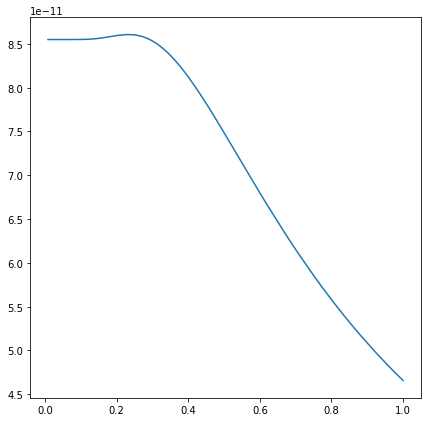

In [27]:
plt.plot(Temp,susceptibility[:,0])

In [523]:
Temp=np.linspace(2.9e-2,5000,100000)
kB=1
beta=1/(kB*Temp)
Jstar=Jfixed
J1=0#Jstar/2.
Ekstar=EFwvfAvg[k]-E_F
#Z_0=2*np.exp(-beta*Ekstar)*2*np.exp(-beta*Jstar/4.)*(np.cosh(beta*J1/2.)+np.cosh((beta/2)*np.sqrt(J1**2/4.+Jstar)))+(1+np.exp(-2*beta*Ekstar))*2*np.exp(-beta*Jstar/4.)*(1+np.cosh((beta/2.)*Jstar))
#dZ_dB=np.exp(-beta*Ekstar)*np.exp(-beta*Jstar/4.)*beta*(np.sinh(beta*J1/2.)+(J1/(np.sqrt(J1**2+Jstar**2)))*np.sinh((beta/2.)*np.sqrt(J1**2+Jstar**2)))
#d2Z_dB2=(1+np.exp(-2*beta*Ekstar))*np.exp(-beta*Jstar/4.)*(beta/2.+(1/Jstar)*np.sinh(beta*Jstar/2.))+np.exp(-beta*Ekstar)*np.exp(-beta*Jstar/4.)*((beta/2.)*np.cosh(beta*Jstar/2.)+(1/np.sqrt(J1**2+Jstar**2))*np.sinh((beta/2.)*np.sqrt(J1**2+Jstar**2))+(beta/2.)*(J1**2/(J1**2+Jstar**2))*np.cosh((beta/2.)*np.sqrt(J1**2+Jstar**2))-(J1**2/(J1**2+Jstar**2)**(3/2.))*np.sinh((beta/2.)*np.sqrt(J1**2+Jstar**2)))                                              

In [524]:
Chi=(1/(4*kB*Temp)+(1/(2*Jstar))*np.sinh(Jstar/(2*kB*Temp)))/(1+np.cosh(Jstar/(2*kB*Temp)))

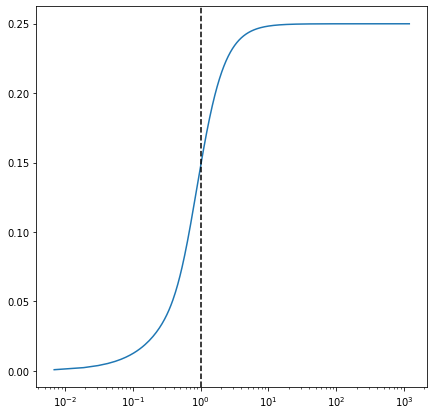

In [525]:
figure,ax=plt.subplots(1)
ax.set_xscale('log')
ax.plot(Temp/Tk,Chi*Temp)
ax.axvline(x=1,linestyle='--',color='k')

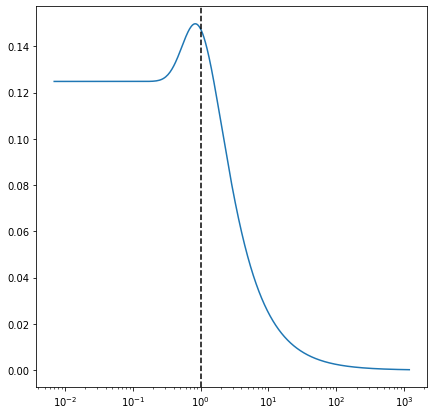

In [526]:
figure,ax=plt.subplots(1)
ax.set_xscale('log')
ax.plot(Temp/Tk,Chi*Tk)
ax.axvline(x=1,linestyle='--',color='k')

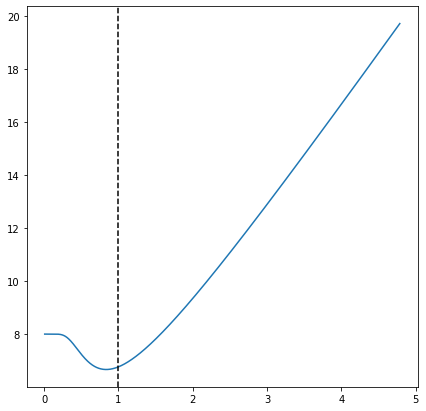

In [530]:
Temp=np.linspace(2.9e-2,20,10000)
kB=1
beta=1/(kB*Temp)
Chi=(1/(4*kB*Temp)+(1/(2*Jstar))*np.sinh(Jstar/(2*kB*Temp)))/(1+np.cosh(Jstar/(2*kB*Temp)))
Jstar=Jfixed
J1=0#Jstar/2.
Ekstar=EFwvfAvg[k]-E_F
figure,ax=plt.subplots(1)
ax.plot(Temp/Tk,1/(Chi*Tk))
ax.axvline(x=1,linestyle='--',color='k')

In [360]:
Chi*Temp

array([0.00086625, 0.00092591, 0.00098557, ..., 0.24288792, 0.2428893 ,
       0.24289069])

$E_{1}=\frac{1}{2}(-\frac{J}{2}+\sqrt{B^{2}+J^{2}})$, $E_{2}=\frac{1}{2}(-\frac{J}{2}-\sqrt{B^{2}+J^{2}})$<br>
$Z(B)=2\exp(\beta\frac{J}{4})\left[\cosh(\beta\frac{B}{2})+\cosh(\frac{\beta}{2}(\sqrt{B^{2}+J^{2}}))\right]$<br>
$\bar{Z}(B)=2\exp(-\beta\epsilon^{*})Z(B+J^{*})+(1+\exp(-2\beta\epsilon^{*}))Z(B)$<br>
$\frac{d\bar{Z}(B)}{dB}=(1+\exp(-2\beta\epsilon^{*}))\exp(\beta\frac{J}{4})\beta\left[\sinh(\beta\frac{B}{2})
+\frac{B}{\sqrt{B^{2}+J^{2}}}\sinh(\frac{\beta}{2}\sqrt{B^{2}+J^{2}})\right]$<br>
$+\exp(-\beta\epsilon^{*})\exp(-\beta\frac{J}{4})\beta\left[\sinh(\beta\frac{B+J^{*}}{2})+\frac{B+J^{*}}{\sqrt{(B+J^{*})^{2}+J^{2}}}\sinh(\frac{\beta}{2}\sqrt{(B+J^{*})^{2}+J^{2}})\right]$<br>
$M=\frac{k_{B}T}{Z(B)}\frac{dZ(B)}{dB}$<br>
<br>
$\frac{dM}{dB}=-\frac{k_{B}T}{(Z(B))^{2}}\left(\frac{dZ(B)}{dB}\right)^{2}+\frac{k_{B}T}{Z(B)}\frac{d^{2}Z(B)}{dB^{2}}$<br>
<br>
$\lim_{B\to 0}k_{B}T\frac{d^{2}Z(B)}{dB^{2}}=(1+\exp(-2\beta\epsilon^{*}))\exp(\beta\frac{J}{4})\left[\frac{\beta}{2}+\frac{1}{J}\sinh(\frac{\beta}{2}J)\right]$<br>
$+\exp(-\beta\epsilon^{*})\exp(\beta\frac{J}{4})\left[\frac{\beta}{2}\cosh(\beta\frac{J^{*}}{2})+\frac{1}{\sqrt{(J^{*})^{2}+J^{2}}}\sinh(\frac{\beta}{2}\sqrt{(J^{*})^{2}+J^{2}})-\frac{(J^{*})^{2}}{((J^{*})^{2}+J^{2})^{3/2}}\sinh(\frac{\beta}{2}\sqrt{(J^{*})^{2}+J^{2}})+\frac{\beta}{2}\frac{(J^{*})^{2}}{(J^{*})^{2}+J^{2}}\cosh(\frac{\beta}{2}\sqrt{(J^{*})^{2}+J^{2}})\right]$<br>

$\lim_{B\to 0}\frac{dM}{dB}=\frac{(\frac{\beta}{4}+\frac{1}{2J}\sinh(\frac{\beta}{2}J))(1+\cosh(\frac{\beta}{2}J))}{(1+\cosh(\frac{\beta}{2}J))^{2}}-\frac{\beta}{4}\frac{1}{(1+\cosh(\frac{\beta}{2}J))^{2}}$<br>
$=\frac{\frac{\beta}{4}\cosh(\frac{\beta}{2}J)+\frac{1}{2J}\sinh(\frac{\beta}{2}J)(1+\cosh(\frac{\beta}{2}J))}{(1+\cosh(\frac{\beta}{2}J))^{2}}$

In [486]:
Temp=np.linspace(2.9e-2,10000,100000)#np.linspace(2.39e-2,20,10000)
Chi1=np.zeros(len(Temp),dtype='int64')
Chi2=np.zeros(len(Temp),dtype='int64')
kB=1
Jstar=Jfixed

In [487]:
Jstar

16.738797816125086

In [488]:
Chi1=(1/(4*kB*Temp))*np.cosh(Jstar/(2*kB*Temp))+(1/(2*Jstar))*np.sinh(Jstar/(2*kB*Temp))*(1+np.cosh(Jstar/(2*kB*Temp)))
Chi2=(1+np.cosh(Jstar/(2*kB*Temp)))**2
Chi=Chi1/Chi2+(1/Chi2)*(1/(4*Temp))

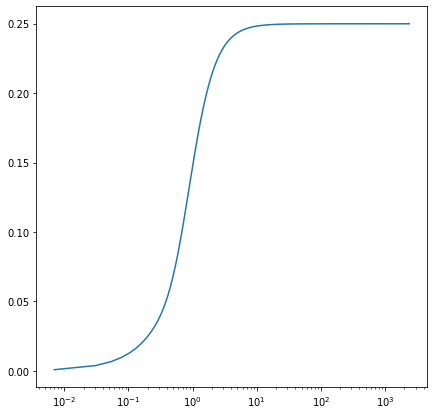

In [489]:
figure,ax=plt.subplots()
ax.set_xscale('log')
ax.plot(Temp/Tk,Chi*Temp)
#plt.xlim([0,5])
#plt.ylim([0,0.20])

$Z=2\exp(\beta\frac{J}{4})\left[1+\cosh(\frac{\beta}{2}J)\right]=\exp(\frac{3J}{4 k_{B}T})+3\exp(-\frac{J}{4 k_{B}T})$<br>
$\frac{dZ}{dT}=-\frac{3J}{4k_{B}T^{2}}\exp(\frac{3J}{4 k_{B}T})+\frac{3J}{4k_{B}T^{2}}\exp(-\frac{J}{4 k_{B}T})$<br>
$\frac{d^{2}Z}{dT^{2}}=\frac{6J}{4k_{B}T^{3}}\exp(\frac{3J}{4 k_{B}T})+\frac{9J^{2}}{16k^{2}_{B}T^{4}}\exp(\frac{3J}{4 k_{B}T})-\frac{6J}{4k_{B}T^{3}}\exp(-\frac{J}{4 k_{B}T})+\frac{3J^{2}}{16k^{2}_{B}T^{4}}\exp(-\frac{J}{4 k_{B}T})$<br>

$\frac{k_{B}T^{2}}{Z}\frac{d^{2}Z}{dT^{2}}=\frac{3J}{2T}\frac{\exp(\frac{3J}{4 k_{B}T})-\exp(-\frac{J}{4 k_{B}T})}{\exp(\frac{3J}{4 k_{B}T})+3\exp(-\frac{J}{4 k_{B}T})}+\frac{J^{2}}{16k_{B}T^{2}}\frac{9\exp(\frac{3J}{4 k_{B}T})+3\exp(-\frac{J}{4 k_{B}T})}{\exp(\frac{3J}{4 k_{B}T})+3\exp(-\frac{J}{4 k_{B}T})}$<br>

$\frac{2k_{B}T}{Z}\frac{dZ}{dT}=-\frac{3J}{2T}\frac{\exp(\frac{3J}{4 k_{B}T})-\exp(-\frac{J}{4 k_{B}T})}{\exp(\frac{3J}{4 k_{B}T})+3\exp(-\frac{J}{4 k_{B}T})}$<br>

$-\frac{k_{B}T^{2}}{Z^{2}}\left(\frac{dZ}{dT}\right)^{2}=-\frac{9J^{2}}{16k_{B}T^{2}}\frac{(\exp(-\frac{J}{4 k_{B}T})-\exp(\frac{3J}{4 k_{B}T}))^{2}}{(\exp(\frac{3J}{4 k_{B}T})+3\exp(-\frac{J}{4 k_{B}T}))^{2}}$

$C=\frac{d}{dT}(k_{B}T^{2}\frac{1}{Z}\frac{dZ}{dT})=-\frac{k_{B}T^{2}}{Z^{2}}\left(\frac{dZ}{dT}\right)^{2}+\frac{2k_{B}T}{Z}\frac{dZ}{dT}+\frac{k_{B}T^{2}}{Z}\frac{d^{2}Z}{dT^{2}}$<br>

$C=\frac{J^{2}}{16k_{B}T^{2}}\frac{9\exp(\frac{3J}{4 k_{B}T})+3\exp(-\frac{J}{4 k_{B}T})}{\exp(\frac{3J}{4 k_{B}T})+3\exp(-\frac{J}{4 k_{B}T})}-\frac{9J^{2}}{16k_{B}T^{2}}\frac{(\exp(-\frac{J}{4 k_{B}T})-\exp(\frac{3J}{4 k_{B}T}))^{2}}{(\exp(\frac{3J}{4 k_{B}T})+3\exp(-\frac{J}{4 k_{B}T}))^{2}}$

In [536]:
Temp=np.linspace(2.9e-2,1000,100000)
boltz1=np.exp(3*Jstar/(4*kB*Temp))
boltz2=np.exp(-Jstar/(4*kB*Temp))
scale=Jstar**2/(16*kB*Temp**2)

In [537]:
boltz2

array([2.14444266e-63, 2.51177737e-47, 8.12984247e-38, ...,
       9.95823961e-01, 9.95824003e-01, 9.95824044e-01])

In [538]:
scale

array([2.08224846e+04, 1.15133992e+04, 7.29361980e+03, ...,
       1.75124100e-05, 1.75120598e-05, 1.75117095e-05])

In [539]:
C=scale*(9*boltz1+3*boltz2)/(boltz1+3*boltz2)-9*scale*((boltz1-boltz2)/(boltz1+3*boltz2))**2

In [540]:
C

array([ 0.00000000e+00, -1.45519152e-11,  0.00000000e+00, ...,
        5.29759980e-05,  5.29749341e-05,  5.29738703e-05])

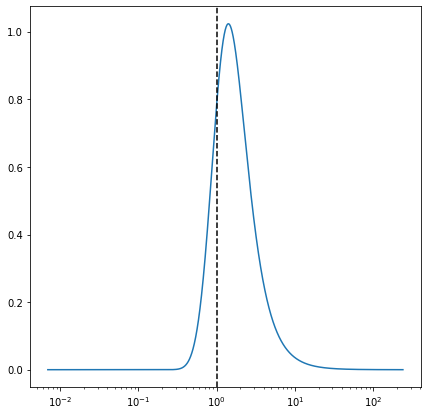

In [541]:
figure,ax=plt.subplots()
ax.set_xscale('log')
ax.plot((Temp/Tk),C)
ax.axvline(x=1,linestyle='--',color='k')

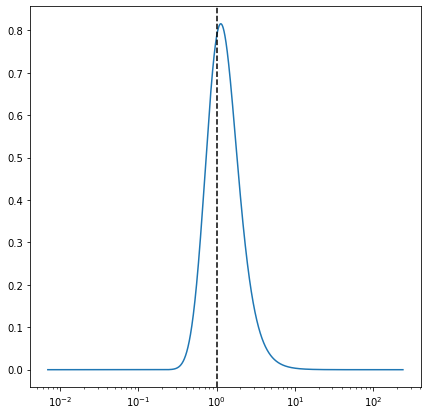

In [543]:
figure,ax=plt.subplots()
ax.set_xscale('log')
ax.plot((Temp/Tk),(C/Temp)*Tk)
ax.axvline(x=1,linestyle='--',color='k')

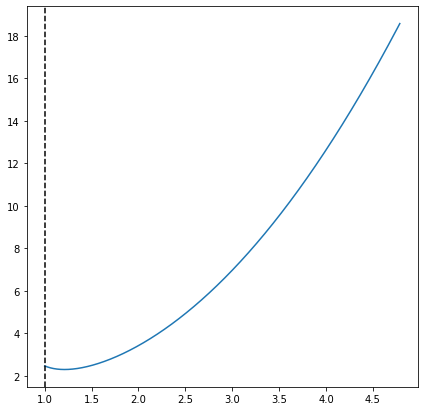

In [440]:
figure,ax=plt.subplots()
ax.plot((Temp/Tk)[2078:],(1/(C/(Temp*Chi))[2078:])*(4*np.pi**2/3))
ax.axvline(x=1,linestyle='--',color='k')

In [443]:
(1/(C/(Temp*Chi))[2078:])*(4*np.pi**2/3)>2

array([ True,  True,  True, ...,  True,  True,  True])

In [435]:
np.where(Temp/Tk>1)

(array([2078, 2079, 2080, ..., 9997, 9998, 9999]),)

In [420]:
C

array([0.        , 0.        , 0.        , ..., 0.17222584, 0.17218956,
       0.1721533 ])

$H^{*}_{K}=J^{*}\mathbf{S}\cdot\mathbf{s}+\sum_{l=N,m=1}^{j^{*},n_{l}}J_{l}S^{z}s^{z}_{l,m}
+\sum_{l=N,m=1}^{j^{*},n_{l}}\epsilon_{l}(\hat{n}_{l,m,\uparrow}+\hat{n}_{l,m,\downarrow})$<br>
$\exp(-\beta H^{*}_{K})=\prod_{l=N,m=1}^{j^{*},n_{l}}\exp(-\beta\epsilon_{l}(\hat{n}_{l,m,\uparrow}+\hat{n}_{l,m,\downarrow}))\times\exp(-\beta(J^{*}\mathbf{S}\cdot\mathbf{s}+\sum_{l=N,m=1}^{j^{*},n_{l}}J_{l}S^{z}s^{z}_{l,m}))$<br>

$\begin{pmatrix}-\frac{J^{*}}{4}+\sum_{l=N,m=1}^{j^{*},n_{l}}\frac{J_{l}}{2}s^{z}_{l,m} & \frac{J^{*}}{2}\\ 
\frac{J^{*}}{2} & -\frac{J^{*}}{4}-\sum_{l=N,m=1}^{j^{*},n_{l}}\frac{J_{l}}{2}s^{z}_{l,m}\end{pmatrix}=-\frac{J^{*}}{4}+\sigma^{z}h_{z}+\frac{J^{*}}{2}\sigma_{x}=-\frac{J^{*}}{4}+A\boldsymbol{\sigma}\cdot\mathbf{\hat{n}}, A=\sqrt{h^{2}_{z}+\frac{(J^{*})^{2}}{4}},\cos\theta=\frac{h_{z}}{\sqrt{h^{2}_{z}+\frac{(J^{*})^{2}}{4}}}$<br>
$\exp(-\beta(J^{*}\mathbf{S}\cdot\mathbf{s}+\sum_{l=N,m=1}^{j^{*},n_{l}}J_{l}S^{z}s^{z}_{l,m}))=2\exp(-\beta\frac{J^{*}}{4})\cosh\left(\sum_{l=N,m=1}^{j^{*},n_{l}}\frac{\beta J_{l}}{2}s^{z}_{l,m}\right)+\exp(\beta\frac{J^{*}}{4})\exp\left(-\beta A\mathbf{\sigma}\cdot\hat{\mathbf{n}}\right)=2\exp(-\beta\frac{J^{*}}{4})\cosh\left(\sum_{l=N,m=1}^{j^{*},n_{l}}\frac{\beta J_{l}}{2}s^{z}_{l,m}\right)+\exp(\beta\frac{J^{*}}{4})\left[\cosh(\beta A)+\boldsymbol{\sigma}\cdot\hat{n}\sinh(\beta A)\right]$<br>

$Tr_{imp+cloud}(\exp(-\beta(J^{*}\mathbf{S}\cdot\mathbf{s}+\sum_{l=N,m=1}^{j^{*},n_{l}}J_{l}S^{z}s^{z}_{l,m})))\approx \exp(\beta\frac{J^{*}}{4})\exp(\beta A)$<br>

$-k_{B}T\log(Tr_{imp+cloud}(\exp(-\beta H^{*}_{K}))\approx \sum_{l,m}\epsilon_{l}(\hat{n}_{l,m,\uparrow}+\hat{n}_{l,m,\downarrow})-\frac{J^{*}}{4}-\frac{J^{*}}{2}\sqrt{1+\frac{4h_{z}^{2}}{(J^{*})^{2}}}$<br>
$\sum_{l,m}\epsilon_{l}(\hat{n}_{l,m,\uparrow}+\hat{n}_{l,m,\downarrow})-\frac{3J^{*}}{4}-\frac{h^{2}_{z}}{J^{*}}$

### Effective Hamiltonian for the Local Fermi liquid at IR fixed point
$H_{LFL}=\sum_{l,m}\epsilon_{l}(\hat{n}_{l,m,\uparrow}+\hat{n}_{l,m,\downarrow})-\sum_{l,l',m,m'}f_{ll'}s^{z}_{l,m}s^{z}_{l,m'}, f_{ll'}=\frac{J_{l}J_{l'}}{J^{*}}, s^{z}_{l,m}=\frac{1}{2}(\hat{n}_{l,m,\uparrow}-\hat{n}_{l,m,\downarrow})$

$\frac{\delta\mathcal{E}}{\delta n_{l,m,\sigma}}=\epsilon_{l}+\sum_{l',m'}\frac{J_{l}J_{l'}}{J^{*}}\delta n_{l',m',-\sigma}$, $~~~~~~~\delta n_{l',m',-\sigma}=\frac{\partial f(\epsilon_{l'})}{\partial T}dT$

$H_{1-LFL}=\sum_{l,m,\sigma}(\epsilon_{l}+\Sigma_{\sigma,l}+\sigma B )\hat{n}_{l,m,\sigma}$

In [548]:
lambdaF=Lambda0*eps**np.linspace(0,steps-1,steps)
ThetaF,LambdaF=np.meshgrid(thetaF0,lambdaF)
Fwvfx_out = coordsFx_irr+LambdaF*np.cos(ThetaF)
Fwvfy_out = coordsFy_irr+LambdaF*np.sin(ThetaF)
EFwvf=-2*(np.cos(Fwvfx_out)+np.cos(Fwvfy_out))
#dispersion of electronic states residing outside the Fermi energy
EFwvfAvg=np.sum(EFwvf,axis=1)/len(thetaF0)

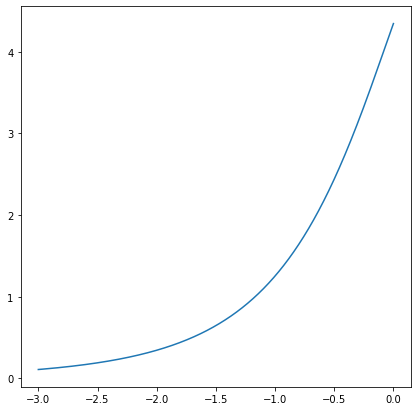

In [582]:
plt.plot(np.log(lambdaF/Lambda0),EFwvfAvg-E_F)

In [585]:
EFwvfAvg-E_F

array([4.3433019 , 4.34289476, 4.34248759, ..., 0.10805831, 0.10804639,
       0.10803447])

In [783]:
Temp=np.linspace(2.9e-2,20,5000)

In [784]:
Temp[1]-Temp[0]

0.003994998999799961

In [785]:
ELambdaGrid,TempGrid=np.meshgrid(EFwvfAvg[0:k+1],Temp)

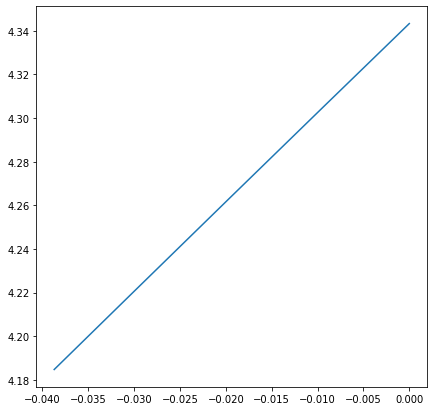

In [786]:
plt.plot(np.log(lambdaF[0:k+1]/Lambda0),EFwvfAvg[0:k+1]-E_F)

In [787]:
FDdistGrid=(1+np.exp(-ELambdaGrid/(TempGrid)))

In [788]:
dFDdist_DT=np.gradient(FDdistGrid,Temp,axis=0)

In [789]:
#quasi particle density for states residing outside Fermi energy 
delta_n = dFDdist_DT[0]*(Temp[1]-Temp[0])

In [790]:
# Kondo coupling
J_LFL=J[0:k+1]

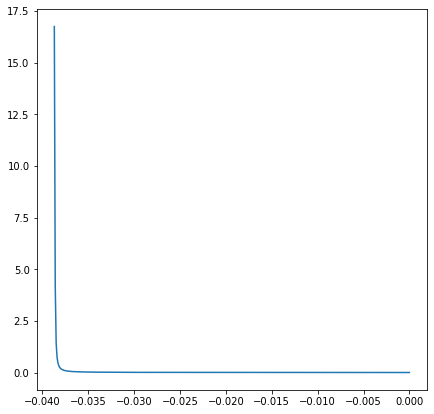

In [842]:
plt.plot(np.log(lambdaF[0:k+1]/Lambda0),J_LFL)

In [843]:
#computing the 1-p self energy
Sigma=np.zeros(k+1)*0.0
for l in range(k+1):
    Sigma[l]=(J_LFL[l]*(np.sum(J_LFL*delta_n)-(J_LFL[l]*delta_n[l])))/(J_LFL[k])

In [845]:
Sigma

array([2.13928818e-08, 2.14482426e-08, 2.15038955e-08, 2.15598428e-08,
       2.16160869e-08, 2.16726302e-08, 2.17294750e-08, 2.17866237e-08,
       2.18440788e-08, 2.19018428e-08, 2.19599181e-08, 2.20183072e-08,
       2.20770129e-08, 2.21360375e-08, 2.21953837e-08, 2.22550541e-08,
       2.23150515e-08, 2.23753784e-08, 2.24360377e-08, 2.24970320e-08,
       2.25583642e-08, 2.26200370e-08, 2.26820534e-08, 2.27444161e-08,
       2.28071281e-08, 2.28701923e-08, 2.29336118e-08, 2.29973894e-08,
       2.30615283e-08, 2.31260315e-08, 2.31909022e-08, 2.32561434e-08,
       2.33217585e-08, 2.33877504e-08, 2.34541227e-08, 2.35208784e-08,
       2.35880211e-08, 2.36555539e-08, 2.37234804e-08, 2.37918040e-08,
       2.38605282e-08, 2.39296565e-08, 2.39991925e-08, 2.40691397e-08,
       2.41395020e-08, 2.42102829e-08, 2.42814861e-08, 2.43531156e-08,
       2.44251751e-08, 2.44976685e-08, 2.45705997e-08, 2.46439728e-08,
       2.47177916e-08, 2.47920604e-08, 2.48667832e-08, 2.49419642e-08,
      

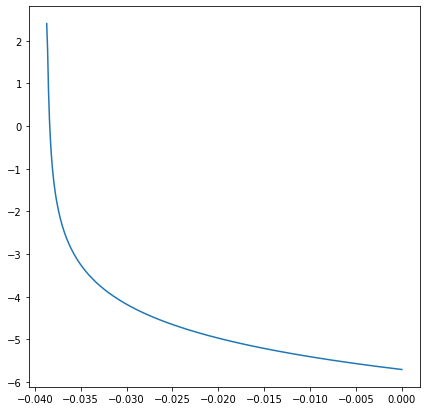

In [806]:
figure,ax=plt.subplots(1)
plt.plot(np.log(lambdaF[0:k+1]/Lambda0),np.log(Sigma))

In [811]:
#computing the renormalized quasiparticle energies
B=np.linspace(1e-3,2e-3,10)
Ekbare=(EFwvfAvg-E_F)[0:k+1]
Bmesh,Ekmesh=np.meshgrid(B,Ekbare)
Bmesh,SigmaMesh=np.meshgrid(B,Sigma)
EkrenUp=Ekmesh+SigmaMesh+Bmesh 
EkrenDown=Ekmesh-SigmaMesh-Bmesh

In [812]:
EkrenUp.shape

(388, 10)

In [830]:
#computing Free energy function
Z=np.zeros([len(Temp),len(B)])
Z.shape
Bgrid,TempGrid=np.meshgrid(B,Temp)  

In [831]:
EkrenUp[0],Ekbare[0]

(4.3486212314743415, 4.343301902260523)

In [832]:
Jstar

16.738797816125086

In [887]:
#B=np.linspace(1e-3,2e-3,50)
#Temp=np.linspace(0.008,20,10000)#np.linspace(0.008,5,10000)
#kB=1
Jstar=Jfixed
#Bmesh,Tmesh=np.meshgrid(B,Temp)
Temp=np.linspace(1e-1,20,5000)#np.linspace(2.9e-2,20,5000)
#a=Bmesh/2.+J[k-20]/4-Jstar/4.
#b=-Bmesh/2.-J[k-20]/4-Jstar/4.
#c=Jfixed/2.
#E1=0.5*(a+b+np.sqrt((a-b)**2+4*c**2))
#E2=0.5*(a+b-np.sqrt((a-b)**2+4*c**2))
#Z=(np.exp(-E1/(kB*Temp))+np.exp(-E2/(kB*Temp))+2*np.exp(-(Jstar/4)/(kB*Temp)))
for i in range(len(Temp)):
    T=Temp[i]
    for j in range(len(B)):
        a=B[j]-Jstar/4.
        b=-B[j]-Jstar/4.
        c=Jstar/2.
        E1=0.5*(a+b+np.sqrt((a-b)**2+4*c**2))
        E2=0.5*(a+b-np.sqrt((a-b)**2+4*c**2))
        Z1=np.exp(-E1/(kB*T))+np.exp(-E2/(kB*T))+2*np.exp(-(Jstar/4)/(kB*T))*np.cosh(B[j]/(2*kB*T))
        EkrenUp=Sigma+B[j]
        EkrenDown=Sigma-B[j]
        Z[i][j]=np.log(Z1)#np.log(1+np.exp(-EkrenUp[k]/(kB*T)))+np.log(1+np.exp(-EkrenDown[k]/(kB*T)))+np.log(Z1)#2*np.pi*np.sqrt(0.2)*(np.log(np.exp(-(EkrenUp[k])/(T))+1)+np.log((np.exp(-(EkrenDown[k])/(T))+1)))#+np.log(Z)

3.324732423300057e+54
3.324732505198509e+54
3.3247325887514695e+54
3.324732673958891e+54
3.3247327608208194e+54
3.324732849337303e+54
3.324732939508295e+54
3.3247330313337485e+54
3.324733124813852e+54
3.324733219948323e+54
3.324733316737396e+54
3.3247334151809785e+54
3.32473351527907e+54
3.324733617031671e+54
3.324733720438781e+54
3.324733825500447e+54
3.3247339322165766e+54
3.324734040587216e+54
3.3247341506124594e+54
3.324734262292166e+54
3.324734375626382e+54
3.3247344906151094e+54
3.324734607258347e+54
3.324734725556143e+54
3.3247348455084975e+54
3.324734967115315e+54
3.324735090376597e+54
3.3247352152924384e+54
3.324735341862838e+54
3.32473547008775e+54
3.324735599967174e+54
3.32473573150111e+54
3.324735864689559e+54
3.32473599953252e+54
3.324736136030042e+54
3.324736274182029e+54
3.324736413988577e+54
3.324736555449638e+54
3.3247366985652136e+54
3.32473684333535e+54
3.324736989759906e+54
3.3247371378391185e+54
3.3247372875727504e+54
3.324737438960992e+54
3.3247375920037014e+54
3.

9.787726446776711e+18
9.787726612190157e+18
5.382255550145324e+18
5.382255595693771e+18
5.382255642162389e+18
5.382255689551139e+18
5.382255737860059e+18
5.382255787089151e+18
5.382255837238451e+18
5.382255888307885e+18
5.382255940297527e+18
5.382255993207302e+18
5.382256047037285e+18
5.382256101787402e+18
5.382256157457727e+18
5.382256214048224e+18
5.382256271558854e+18
5.382256329989692e+18
5.382256389340664e+18
5.382256449611806e+18
5.382256510803158e+18
5.382256572914642e+18
5.382256635946298e+18
5.382256699898163e+18
5.382256764770162e+18
5.382256830562331e+18
5.38225689727471e+18
5.382256964907261e+18
5.382257033459944e+18
5.382257102932798e+18
5.382257173325863e+18
5.382257244639061e+18
5.382257316872468e+18
5.38225739002601e+18
5.38225746409976e+18
5.382257539093644e+18
5.382257615007738e+18
5.382257691841965e+18
5.382257769596365e+18
5.382257848270935e+18
5.382257927865716e+18
5.382258008380669e+18
5.382258089815717e+18
5.382258172171013e+18
5.382258255446482e+18
5.38225833964

203187925833.1838
203187927290.6833
203187928769.15305
203187930268.59454
203187931789.00778
203187933330.39206
203187934892.74658
203187936476.07288
203187938080.3709
203187939705.63992
203187941351.88
203187943019.0918
203187944707.2746
203187946416.4277
203187948146.55328
203187949897.64914
203187951669.71677
203187953462.7554
203187955276.76505
203187957111.74716
203187958967.69888
203187960844.6223
203187962742.51752
203187964661.38373
203187966601.22095
203187968562.02924
203187970543.80923
203187972546.56027
203187974570.28235
203187976614.97617
164172984289.91577
164172985121.79794
164172985970.48502
164172986835.97812
164172987718.27728
164172988617.38132
164172989533.2914
164172990466.00696
164172991415.52914
164172992381.8562
164172993364.98932
164172994364.9279
164172995381.67252
164172996415.2226
164172997465.5782
164172998532.74036
164172999616.70685
164173000717.4794
164173001835.0586
164173002969.44266
164173004120.63278
164173005288.62836
164173006473.42944
16417300767

156817802.8277987
156817803.7368963
156817804.65772486
156817805.5902832
156817806.53457242
156817807.49059147
156817808.45834085
156817809.4378206
156817810.4290307
156817811.43197113
156817812.44664195
156817813.47304308
156817814.51117405
156817815.5610359
156817816.62262812
156817817.69595015
156817818.78100306
156817819.87778524
156817820.9862983
156817822.1065423
156817823.23851553
156817824.38221967
140167777.35754418
140167777.87345675
140167778.399792
140167778.93654934
140167779.48372933
140167780.04133147
140167780.60935625
140167781.18780366
140167781.77667373
140167782.37596592
140167782.98568076
140167783.60581824
140167784.23637787
140167784.87736064
140167785.52876505
140167786.1905926
140167786.8628423
140167787.5455141
140167788.23860908
140167788.9421262
140167789.65606546
140167790.38042787
140167791.1152119
140167791.8604191
140167792.61604893
140167793.38210088
140167794.1585755
140167794.94547227
140167795.74279168
140167796.5505337
140167797.36869842
140167798.1

1140330.1270575246
1140330.1313129019
1140330.1356313191
1140330.14001278
1140330.1444572806
1140330.1489648272
1140330.1535354173
1140330.1581690474
1140330.1628657193
1140330.1676254347
1140330.1724481962
1140330.1773339955
1140330.1822828404
1140330.1872947272
1140330.1923696578
1140330.1975076282
1140330.2027086443
1140330.2079727002
1140330.2132998002
1140330.2186899416
1140330.224143127
1140330.2296593562
1140330.235238623
1140330.2408809378
1140330.2465862923
1140330.252354693
1140330.2581861329
1140330.264080615
1140330.2700381407
1140330.2760587102
1140330.2821423216
1140330.288288975
1072412.304044964
1072412.3069667893
1072412.3099476423
1072412.3129875176
1072412.3160864227
1072412.3192443538
1072412.322461311
1072412.3257372961
1072412.3290723092
1072412.3324663464
1072412.3359194116
1072412.3394315047
1072412.3430026218
1072412.3466327689
1072412.3503219401
1072412.3540701391
1072412.3578773644
1072412.3617436155
1072412.3656688966
1072412.3696532017
1072412.373696535
107

61215.371255864506
61215.371420350915
61215.371587511894
61215.371757347566
61215.37192985771
61215.37210504232
61215.37228290173
61215.372463435706
61215.37264664416
61215.372832527195
61215.3730210848
61215.37321231699
61215.373406223865
61215.37360280521
61215.37380206102
61215.37400399152
61215.37420859671
61215.374415876366
61215.3746258306
61215.374838459415
61215.37505376281
61215.37527174078
61215.37549239343
61215.37571572045
61215.37594172216
61215.37617039844
61215.3764017493
61215.376635774854
61215.376872474764
61215.37711184937
61215.37735389854
61215.3775986223
61215.37784602063
61215.37809609355
61215.37834884093
61215.37860426311
61215.378862359656
61215.37912313088
58909.932446618965
58909.93257358074
58909.932703107464
58909.93283519894
58909.93296985537
58909.93310707665
58909.933246862885
58909.93338921397
58909.93353413001
58909.9336816108
58909.93383165654
58909.93398426724
58909.93413944269
58909.934297183085
58909.934457488336
58909.934620358545
58909.934785793

10932.976726326888
10932.976751515695
10932.976777107544
10932.976803102414
10932.976829500287
10932.976856301202
10932.976883505138
10932.976911112097
10932.976939122058
10932.97696753506
10932.976996351066
10932.977025570111
10932.97705519218
10932.97708521725
10932.977115645343
10932.977146476476
10932.977177710614
10932.977209347771
10932.977241387953
10932.977273831175
10932.9773066774
10932.977339926645
10932.977373578913
10932.977407634204
10932.977442092517
10932.97747695385
10932.977512218225
10932.977547885584
10932.977583955986
10932.977620429408
10932.977657305852
10932.97769458532
10932.977732267787
10932.977770353298
10932.97780884183
10932.977847733366
10932.97788702794
10638.097874951836
10638.097894306258
10638.097914051663
10638.097934188065
10638.097954715467
10638.097975633867
10638.097996943248
10638.098018643648
10638.098040735065
10638.098063217443
10638.098086090838
10638.098109355215
10638.09813301061
10638.098157057004
10638.098181494377
10638.098206322768
106

2811.093027163573
2811.093031720832
2811.0930363665816
2811.093041100818
2811.0930459235497
2811.0930508347683
2811.093055834482
2811.093060922681
2811.093066099372
2811.0930713645557
2811.093076718229
2811.0930821603924
2811.0930876910456
2811.0930933101886
2811.093099017824
2811.093104813947
2811.093110698565
2811.09311667167
2811.0931227332653
2811.0931288833526
2811.093135121928
2811.093141448995
2811.093147864555
2811.0931543686042
2811.0931609611416
2811.093167642171
2811.093174411693
2811.093181269702
2811.093188216204
2811.0931952511955
2811.0932023746795
2811.093209586651
2811.093216887115
2811.093224276066
2811.09323175351
2811.0932393194435
2811.0932469738696
2811.0932547167854
2811.0932625481887
2811.0932704680868
2811.0932784764727
2811.0932865733535
2811.093294758719
2811.093303032577
2811.0933113949245
2811.093319845765
2811.0933283850927
2811.0933370129155
2755.575571119863
2755.575575402851
2755.5755797723614
2755.5755842283934
2755.5755887709524
2755.575593400036
2755

1103.5276073510627
1103.527609297192
1103.527611273969
1103.5276132813924
1103.5276153194648
1103.5276173881857
1103.5276194875523
1103.5276216175685
1103.5276237782305
1103.5276259695422
1103.5276281915005
1103.5276304441074
1103.52763272736
1103.5276350412623
1103.5276373858114
1103.527639761009
1103.5276421668543
1103.5276446033463
1103.527647070487
1103.5276495682745
1103.5276520967104
1103.527654655793
1103.5276572455243
1103.5276598659025
1103.5276625169292
1103.5276651986046
1103.5276679109247
1103.5276706538953
1103.5276734275128
1103.5276762317778
1103.5276790666906
1103.52768193225
1103.5276848284582
1103.527687755315
1103.5276907128173
1103.5276937009694
1086.521311313434
1086.5213128038065
1086.521314324286
1086.5213158748734
1086.5213174555704
1086.5213190663753
1086.521320707289
1086.5213223783105
1086.5213240794417
1086.5213258106808
1086.5213275720287
1086.5213293634852
1086.5213311850496
1086.5213330367228
1086.5213349185046
1086.5213368303955
1086.5213387723932
1086.5

514.6003818563208
514.6003828051213
514.6003837666572
514.6003847409293
514.6003857279364
514.6003867276792
514.6003877401577
514.6003887653716
514.6003898033215
514.6003908540067
514.600391917427
514.6003929935836
514.6003940824752
514.6003951841027
514.6003962984661
514.6003974255644
514.6003985653987
514.6003997179685
514.600400883274
514.6004020613151
514.6004032520915
514.6004044556034
514.6004056718513
514.6004069008345
514.6004081425536
508.29136047888204
508.2913611003343
508.291361734341
508.2913623809018
508.2913630400175
508.2913637116876
508.2913643959127
508.29136509269176
508.2913658020262
508.2913665239147
508.2913672583576
508.29136800535593
508.29136876490827
508.29136953701504
508.29137032167677
508.2913711188929
508.29137192866364
508.2913727509883
508.29137358586877
508.2913744333033
508.2913752932923
508.29137616583574
508.2913770509337
508.29137794858656
508.2913788587943
508.2913797815561
508.29138071687237
508.29138166474354
508.29138262516966
508.29138359814976

247.70500088828067
247.70500117784454
247.70500147282118
247.70500177320977
247.7050020790112
247.70500239022476
247.7050027068509
247.70500302888945
247.70500335634034
247.70500368920383
247.7050040274795
247.70500437116775
247.70500472026814
247.70500507478093
247.70500543470652
247.70500580004426
247.70500617079438
247.70500654695707
247.70500692853193
247.7050073155194
247.70500770791946
247.70500810573165
247.70500850895624
247.7050089175932
247.70500933164274
247.70500975110468
247.7050101759792
247.70501060626586
247.70501104196492
247.70501148307656
247.70501192960057
247.70501238153696
247.70501283888572
247.70501330164686
247.7050137698204
247.7050142434067
247.70501472240497
247.70501520681583
247.70501569663907
247.7050161918749
247.7050166925229
247.70501719858325
247.70501771005618
247.70501822694175
247.70501874923943
247.7050192769495
245.334008713012
245.3340089778991
245.3340092481374
245.33400952372668
245.33400980466735
245.33401009095925
245.33401038260257
245.3340

155.22736955479493
155.2273698512449
155.22737015079915
155.22737045345752
153.98165891832556
153.98165907050648
153.98165922576155
153.98165938409105
153.981659545495
153.98165970997312
153.98165987752566
153.98166004815263
153.98166022185407
153.98166039862966
153.98166057847968
153.98166076140413
153.98166094740273
153.98166113647594
153.98166132862343
153.98166152384522
153.98166172214144
153.98166192351184
153.9816621279568
153.98166233547607
153.98166254606966
153.98166275973765
153.98166297647995
153.9816631962967
153.98166341918773
153.98166364515322
153.98166387419286
153.98166410630705
153.9816643414956
153.9816645797584
153.98166482109565
153.9816650655072
153.9816653129932
153.98166556355346
153.9816658171882
153.9816660738971
153.98166633368055
153.9816665965382
153.98166686247023
153.98166713147688
153.98166740355754
153.98166767871277
153.98166795694232
153.9816682382463
153.98166852262443
153.981668810077
153.98166910060402
153.98166939420534
153.9816696908811
153.98166

103.93320783518504
103.93320799493378
103.93320815659577
103.9332083201708
103.9332084856591
103.93320865306053
103.93320882237502
103.93320899360276
103.93320916674365
103.93320934179778
103.93320951876497
103.93320969764531
103.9332098784388
103.93321006114553
103.93321024576532
103.93321043229835
103.2259823518225
103.22598244574118
103.22598254155724
103.22598263927061
103.22598273888127
103.22598284038929
103.22598294379472
103.22598304909742
103.2259831562976
103.22598326539497
103.22598337638982
103.22598348928196
103.22598360407139
103.2259837207583
103.22598383934249
103.22598395982398
103.22598408220284
103.225984206479
103.22598433265263
103.22598446072354
103.22598459069175
103.22598472255744
103.22598485632031
103.22598499198058
103.22598512953832
103.22598526899334
103.22598541034557
103.22598555359527
103.22598569874235
103.22598584578671
103.22598599472846
103.2259861455675
103.22598629830394
103.22598645293773
103.22598660946883
103.22598676789731
103.22598692822308
10

72.54225554402642
72.54225561979008
72.54225569678565
72.54225577501312
72.54225585447251
72.54225593516388
72.54225601708721
72.5422561002424
72.54225618462955
72.54225627024863
72.5422563570996
72.5422564451825
72.54225653449743
72.5422566250442
72.54225671682289
72.54225680983356
72.54225690407613
72.54225699955062
72.54225709625707
72.54225719419544
72.54225729336572
72.54225739376797
72.54225749540207
72.54225759826815
72.5422577023662
72.5422578076961
72.54225791425797
72.54225802205183
72.54225813107752
72.54225824133519
72.54225835282477
72.54225846554625
72.54225857949973
72.5422586946851
72.54225881110239
72.5422589287516
72.54225904763277
72.54225916774584
72.12185961637769
72.12185967692253
72.12185973869052
72.12185980168162
72.12185986589584
72.12185993133322
72.12185999799371
72.1218600658773
72.12186013498406
72.12186020531394
72.12186027686691
72.12186034964306
72.12186042364236
72.12186049886472
72.12186057531025
72.12186065297888
72.12186073187068
72.12186081198553
7

56.3847174882871
56.38471756173663
56.38471763608734
56.384717711339285
56.38471778749246
56.38471786454688
56.384717942502476
56.384718021359355
56.38471810111737
56.38471818177667
56.384718263337156
56.38471834579892
56.38471842916182
56.38471851342601
56.384718598591384
56.38471868465799
56.38471877162583
56.38471885949485
56.095143310204094
56.09514335452877
56.09514339974891
56.09514344586447
56.09514349287548
56.095143540781905
56.095143589583785
56.095143639281126
56.09514368987398
56.09514374136219
56.09514379374586
56.09514384702504
56.095143901199634
56.09514395626969
56.095144012235146
56.095144069096065
56.095144126852446
56.09514418550429
56.095144245051536
56.095144305494294
56.095144366832464
56.095144429066046
56.09514449219513
56.09514455621964
56.095144621139596
56.09514468695501
56.09514475366584
56.09514482127218
56.09514488977393
56.09514495917114
56.0951450294638
56.095145100651884
56.09514517273542
56.09514524571442
56.09514531958887
56.095145394358745
56.0951454

42.87538719549323
42.87538723094355
42.87538726703264
42.87538730376045
42.875387341127
42.875387379132334
42.87538741777637
42.87538745705918
42.87538749698073
42.87538753754102
42.875387578740046
42.87538762057781
42.87538766305434
42.875387706169626
42.87538774992362
42.87538779431637
42.875387839347866
42.875387885018114
42.87538793132712
42.87538797827485
42.87538802586132
42.875388074086544
42.87538812295051
42.875388172453235
42.87538822259469
42.875388273374895
42.87538832479385
42.875388376851525
42.87538842954797
42.875388482883146
42.87538853685709
42.87538859146975
42.875388646721156
42.87538870261134
42.875388759140215
42.87538881630788
42.87538887411428
42.87538893255943
42.87538899164331
42.87538905136593
42.875389111727294
42.87538917272743
42.87538923436628
42.8753892966439
42.68401139335609
42.68401142479537
42.68401145686978
42.68401148957931
42.68401152292399
42.684011556903805
42.68401159151876
42.68401162676882
42.684011662654086
42.684011699174434
42.684011736329

36.58282630745489
36.58282634268879
36.582826378444665
36.58282641472254
36.58282645152238
36.582826488844226
36.58282652668806
36.58282656505386
36.58282660394164
36.58282664335142
36.58282668328319
36.58282672373693
36.58282676471265
36.58282680621035
36.58282684823006
36.58282689077173
36.58282693383539
36.58282697742103
36.58282702152865
36.58282706615826
36.58282711130987
36.58282715698344
36.582827203178994
36.58282724989655
36.582827297136085
36.58282734489761
36.58282739318111
36.582827441986566
36.58282749131404
36.5828275411635
36.58282759153493
36.58282764242834
36.433002656789675
36.43300268249273
36.43300270871502
36.433002735456554
36.43300276271735
36.4330027904974
36.43300281879671
36.43300284761527
36.4330028769531
36.43300290681015
36.43300293718647
36.43300296808204
36.43300299949688
36.433003031430964
36.43300306388428
36.43300309685688
36.43300313034871
36.43300316435979
36.433003198890155
36.43300323393974
36.4330032695086
36.43300330559671
36.43300334220405
36.43

28.42904703102814
28.429047061394677
28.429047092138436
28.429047123259434
28.42904715475764
28.429047186633085
28.42904721888574
28.42904725151562
28.42904728452273
28.429047317907056
28.42904735166862
28.4290473858074
28.42904742032341
28.42904745521664
28.429047490487083
28.42904752613476
28.42904756215966
28.429047598561784
28.429047635341146
28.3283221166082
28.328322135194906
28.328322154157107
28.328322173494794
28.328322193207963
28.328322213296616
28.32832223376078
28.328322254600415
28.328322275815548
28.328322297406164
28.32832231937228
28.328322341713875
28.32832236443096
28.32832238752354
28.3283224109916
28.32832243483516
28.328322459054192
28.328322483648723
28.328322508618747
28.328322533964258
28.32832255968525
28.32832258578174
28.328322612253718
28.328322639101177
28.328322666324148
28.328322693922587
28.328322721896512
28.328322750245935
28.328322778970843
28.328322808071245
28.328322837547134
28.32832286739852
28.328322897625387
28.328322928227742
28.32832295920559

24.724908652893507
24.724908681974767
24.72490871137041
24.72490874108046
24.724908771104896
24.72490880144373
24.724908832096954
24.644446309573436
24.644446325069442
24.644446340878496
24.644446357000593
24.64444637343574
24.64444639018394
24.644446407245194
24.644446424619485
24.64444644230685
24.644446460307247
24.644446478620694
24.644446497247205
24.644446516186754
24.644446535439368
24.644446555005022
24.64444657488373
24.644446595075475
24.644446615580275
24.644446636398147
24.64444665752905
24.644446678973
24.64444670073002
24.644446722800065
24.644446745183174
24.644446767879344
24.64444679088856
24.64444681421081
24.644446837846115
24.64444686179448
24.644446886055903
24.64444691063036
24.644446935517873
24.644446960718437
24.64444698623205
24.64444701205872
24.644447038198436
24.644447064651196
24.644447091417007
24.644447118495883
24.644447145887806
24.644447173592763
24.64444720161078
24.64444722994185
24.644447258585984
24.644447287543144
24.64444731681336
24.64444734639

20.67874878687996
20.678748801156875
20.678748815682095
20.67874883045562
20.678748845477422
20.67874886074753
20.67874887626592
20.67874889203262
20.678748908047602
20.678748924310874
20.67874894082246
20.678748957582332
20.678748974590487
20.678748991846952
20.67874900935169
20.678749027104743
20.678749045106084
20.67874906335572
20.678749081853642
20.67874910059987
20.678749119594393
20.6787491388372
20.678749158328316
20.678749178067715
20.67874919805541
20.678749218291404
20.67874923877568
20.678749259508265
20.678749280489132
20.678749301718298
20.67874932319576
20.678749344921524
20.678749366895566
20.678749389117915
20.67874941158856
20.6787494343075
20.678749457274723
20.678749480490236
20.67874950395405
20.678749527666174
20.67874955162657
20.678749575835276
20.618729537518952
20.61872954976209
20.618729562252568
20.61872957499038
20.61872958797553
20.618729601208006
20.61872961468783
20.61872962841498
20.618729642389475
20.6187296566113
20.618729671080462
20.61872968579696
2

17.951127031005218
17.951127041176367
17.951127051552994
17.951127062135097
17.951127072922674
17.951127083915733
17.95112709511427
17.951127106518275
17.95112711812778
17.951127129942744
17.951127141963195
17.951127154189116
17.951127166620516
17.9511271792574
17.951127192099758
17.951127205147596
17.951127218400906
17.951127231859694
17.95112724552397
17.951127259393715
17.951127273468938
17.951127287749635
17.951127302235818
17.951127316927476
17.951127331824615
17.951127346927226
17.951127362235308
17.95112737774888
17.951127393467928
17.95112740939245
17.951127425522454
17.95112744185793
17.951127458398897
17.951127475145327
17.951127492097243
17.951127509254626
17.951127526617498
17.95112754418584
17.951127561959666
17.95112757993897
17.95112759812374
17.951127616514
17.95112763510974
17.95112765391095
17.95112767291764
17.951127692129802
17.95112771154745
17.951127731170576
17.951127750999177
17.95112777103325
17.903768837615377
17.903768847750417
17.903768858090196
17.903768868

15.481534318937568
15.481534329109236
15.481534339449036
15.481534349956954
15.481534360633004
15.481534371477176
15.481534382489471
15.481534393669907
15.481534405018461
15.48153441653514
15.481534428219954
15.481534440072885
15.481534452093948
15.481534464283138
15.481534476640453
15.481534489165893
15.48153450185946
15.48153451472116
15.481534527750986
15.481534540948937
15.481534554315006
15.481534567849215
15.481534581551543
15.481534595421998
15.481534609460583
15.481534623667288
15.481534638042126
15.48153465258509
15.481534667296186
15.481534682175393
15.481534697222742
15.481534712438215
15.481534727821813
15.481534743373539
15.481534759093382
15.481534774981359
15.481534791037467
15.481534807261696
15.481534823654055
15.444764139362082
15.444764147657384
15.44476415612027
15.44476416475073
15.44476417354878
15.444764182514405
15.44476419164762
15.444764200948402
15.444764210416789
15.444764220052736
15.444764229856274
15.4447642398274
15.444764249966102
15.444764260272386
15.

14.05822220575026
14.058222217165666
14.05822222872837
14.058222240438361
14.058222252295659
14.058222264300245
14.05822227645213
14.058222288751308
14.058222301197787
14.058222313791559
14.058222326532626
14.05822233942099
14.058222352456644
14.058222365639596
14.058222378969848
14.058222392447394
14.058222406072234
14.058222419844368
14.058222433763795
14.058222447830527
14.058222462044547
14.058222476405868
14.027138233846827
14.027138241115747
14.027138248531513
14.02713825609412
14.027138263803577
14.027138271659885
14.027138279663035
14.027138287813028
14.027138296109877
14.02713830455357
14.027138313144105
14.027138321881491
14.027138330765727
14.027138339796805
14.027138348974733
14.027138358299503
14.027138367771125
14.027138377389582
14.027138387154901
14.02713839706706
14.027138407126065
14.027138417331921
14.027138427684614
14.027138438184164
14.027138448830561
14.027138459623803
14.027138470563887
14.027138481650816
14.0271384928846
14.027138504265228
14.027138515792705
14

12.362191359580343
12.362191370239328
12.362191381021539
12.362191391926972
12.362191402955636
12.362191414107528
12.362191425382639
12.362191436780979
12.362191448302537
12.362191459947326
12.362191471715338
12.362191483606578
12.362191495621046
12.337448112168168
12.337448118250764
12.337448124456236
12.337448130784589
12.337448137235823
12.337448143809938
12.337448150506932
12.33744815732681
12.33744816426957
12.337448171335206
12.337448178523724
12.337448185835122
12.337448193269402
12.337448200826564
12.3374482085066
12.337448216309525
12.337448224235326
12.337448232284007
12.337448240455576
12.33744824875002
12.33744825716734
12.337448265707549
12.337448274370631
12.337448283156595
12.337448292065448
12.337448301097174
12.337448310251784
12.337448319529274
12.337448328929645
12.337448338452893
12.337448348099027
12.337448357868038
12.33744836775993
12.337448377774702
12.337448387912357
12.337448398172892
12.337448408556309
12.337448419062602
12.337448429691777
12.337448440443838


11.246837846474504
11.246837854080889
11.246837861795171
11.24683786961735
11.246837877547414
11.246837885585368
11.24683789373122
11.24683790198496
11.246837910346594
11.246837918816121
11.24683792739354
11.24683793607885
11.246837944872052
11.246837953773147
11.24683796278213
11.246837971899012
11.246837981123777
11.246837990456442
11.246837999896998
11.246838009445444
11.246838019101782
11.246838028866014
11.24683803873814
11.246838048718153
11.246838058806055
11.246838069001857
11.246838079305546
11.246838089717128
11.246838100236609
11.225986046247796
11.225986051574466
11.22598605700874
11.225986062550627
11.225986068200124
11.225986073957223
11.225986079821942
11.225986085794263
11.225986091874198
11.225986098061743
11.22598610435689
11.225986110759656
11.225986117270025
11.225986123888008
11.225986130613595
11.2259861374468
11.225986144387605
11.225986151436022
11.225986158592052
11.225986165855693
11.225986173226934
11.22598618070579
11.225986188292255
11.22598619598633
11.225

10.302479218222471
10.30247922303265
10.302479227938077
10.302479232938762
10.30247923803469
10.302479243225877
10.302479248512311
10.302479253894
10.302479259370937
10.302479264943123
10.302479270610569
10.302479276373258
10.3024792822312
10.302479288184395
10.30247929423284
10.302479300376532
10.302479306615476
10.302479312949675
10.302479319379128
10.302479325903825
10.302479332523776
10.302479339238976
10.302479346049429
10.302479352955134
10.302479359956088
10.30247936705229
10.30247937424375
10.30247938153046
10.302479388912419
10.30247939638963
10.302479403962092
10.302479411629804
10.302479419392766
10.302479427250981
10.302479435204447
10.302479443253166
10.30247945139713
10.30247945963635
10.302479467970823
10.302479476400542
10.302479484925518
10.30247949354574
10.302479502261214
10.302479511071938
10.302479519977917
10.302479528979145
10.302479538075625
10.302479547267351
10.302479556554333
10.284736045919713
10.284736050623046
10.284736055421392
10.284736060314758
10.28473

9.404787376050272
9.404787380186141
9.404787384405562
9.40478738870853
9.40478739309506
9.404787397565135
9.404787402118764
9.404787406755945
9.404787411476688
9.404787416280973
9.404787421168814
9.40478742614021
9.40478743119516
9.404787436333658
9.404787441555714
9.40478744686132
9.40478745225048
9.404787457723186
9.404787463279455
9.404787468919274
9.404787474642642
9.404787480449565
9.404787486340043
9.404787492314071
9.404787498371652
9.40478750451279
9.404787510737474
9.404787517045715
9.40478752343751
9.404787529912856
9.404787536471757
9.404787543114207
9.404787549840213
9.404787556649769
9.404787563542879
9.404787570519543
9.404787577579757
9.404787584723525
9.40478759195085
9.404787599261725
9.40478760665615
9.404787614134134
9.404787621695666
9.404787629340756
9.404787637069392
9.404787644881582
9.404787652777326
9.404787660756625
9.404787668819475
9.404787676965881
9.38983026142599
9.38983026555235
9.389830269762065
9.389830274055143
9.38983027843158
9.389830282891378
9.389

8.644401142064893
8.644401147644997
8.644401153299011
8.644401159026932
8.644401164828762
8.644401170704501
8.64440117665415
8.644401182677704
8.644401188775172
8.644401194946541
8.644401201191824
8.644401207511013
8.644401213904116
8.644401220371124
8.644401226912036
8.644401233526866
8.644401240215597
8.644401246978243
8.644401253814792
8.64440126072525
8.644401267709622
8.6444012747679
8.644401281900084
8.64440128910618
8.631666956918258
8.63166696056885
8.631666964293194
8.631666968091285
8.631666971963122
8.631666975908713
8.631666979928053
8.631666984021143
8.631666988187982
8.631666992428565
8.631666996742904
8.63166700113099
8.631667005592824
8.63166701012841
8.631667014737747
8.631667019420831
8.631667024177663
8.631667029008241
8.631667033912576
8.631667038890658
8.631667043942487
8.631667049068065
8.631667054267393
8.631667059540472
8.631667064887303
8.631667070307879
8.631667075802204
8.631667081370278
8.631667087012106
8.631667092727678
8.631667098517003
8.631667104380078


8.060465050603915
8.06046505643854
8.060465062339839
8.060465068307824
8.060465074342488
8.060465080443835
8.060465086611865
8.060465092846572
8.060465099147962
8.060465105516037
8.060465111950789
8.060465118452225
8.049347805289079
8.049347808583077
8.049347811943619
8.049347815370703
8.049347818864339
8.049347822424515
8.049347826051237
8.049347829744503
8.049347833504322
8.04934783733068
8.049347841223582
8.049347845183034
8.049347849209031
8.049347853301569
8.049347857460656
8.04934786168629
8.049347865978465
8.049347870337185
8.049347874762455
8.049347879254267
8.049347883812626
8.04934788843753
8.049347893128976
8.049347897886971
8.049347902711512
8.049347907602597
8.049347912560227
8.049347917584404
8.049347922675127
8.049347927832393
8.049347933056204
8.049347938346562
8.049347943703465
8.049347949126913
8.049347954616909
8.049347960173447
8.049347965796532
8.04934797148616
8.049347977242334
8.049347983065058
8.04934798895432
8.049347994910134
8.049348000932488
8.04934800702139

7.510143165985671
7.51014317069752
7.51014317546939
7.510143180301286
7.510143185193206
7.510143190145148
7.510143195157113
7.510143200229102
7.510143205361113
7.510143210553151
7.510143215805213
7.510143221117294
7.510143226489401
7.510143231921532
7.510143237413685
7.510143242965863
7.510143248578062
7.510143254250285
7.510143259982535
7.510143265774808
7.510143271627103
7.500474400856581
7.500474403822027
7.500474406847381
7.500474409932639
7.500474413077809
7.500474416282884
7.500474419547866
7.5004744228727604
7.5004744262575604
7.500474429702266
7.500474433206884
7.500474436771409
7.500474440395839
7.5004744440801785
7.500474447824427
7.500474451628585
7.500474455492645
7.500474459416615
7.500474463400497
7.500474467444285
7.500474471547979
7.500474475711585
7.500474479935094
7.500474484218512
7.500474488561843
7.500474492965076
7.500474497428218
7.50047450195127
7.500474506534231
7.500474511177098
7.500474515879874
7.500474520642555
7.500474525465147
7.500474530347647
7.50047453

6.987773659789435
6.987773663370575
6.987773667005564
6.987773670694404
6.987773674437095
6.987773678233639
6.987773682084035
6.987773685988284
6.9877736899463825
6.987773693958332
6.987773698024134
6.98777370214379
6.987773706317295
6.987773710544653
6.987773714825861
6.987773719160924
6.987773723549835
6.987773727992599
6.987773732489216
6.987773737039683
6.987773741644001
6.987773746302173
6.987773751014197
6.9877737557800685
6.987773760599795
6.987773765473374
6.987773770400804
6.987773775382085
6.987773780417216
6.987773785506201
6.987773790649038
6.987773795845726
6.987773801096265
6.9794087137029
6.979408716363727
6.979408719078309
6.979408721846644
6.979408724668733
6.979408727544576
6.979408730474174
6.979408733457524
6.979408736494632
6.979408739585491
6.979408742730106
6.979408745928475
6.979408749180596
6.9794087524864725
6.979408755846102
6.979408759259488
6.979408762726626
6.979408766247516
6.979408769822165
6.979408773450566
6.97940877713272
6.979408780868629
6.979408784

6.615512252366634
6.615512255116505
6.615512257915925
6.615512260764889
6.615512263663402
6.615512266611463
6.615512269609071
6.615512272656226
6.615512275752928
6.615512278899178
6.615512282094973
6.615512285340316
6.615512288635207
6.615512291979646
6.61551229537363
6.615512298817164
6.615512302310243
6.61551230585287
6.615512309445045
6.615512313086766
6.615512316778035
6.61551232051885
6.615512324309213
6.615512328149124
6.615512332038581
6.615512335977587
6.615512339966139
6.615512344004238
6.615512348091885
6.615512352229078
6.615512356415819
6.615512360652107
6.615512364937943
6.615512369273326
6.615512373658254
6.615512378092733
6.615512382576758
6.61551238711033
6.615512391693449
6.615512396326114
6.615512401008327
6.6155124057400885
6.615512410521395
6.615512415352252
6.608032300972503
6.608032303420853
6.6080323059186625
6.608032308465933
6.608032311062666
6.6080323137088595
6.608032316404516
6.608032319149632
6.608032321944213
6.608032324788253
6.608032327681754
6.608032330

6.24844425156843
6.248444254631861
6.248444257740674
6.248444260894874
6.248444264094456
6.248444267339422
6.248444270629775
6.24844427396551
6.2484442773466276
6.24844428077313
6.248444284245019
6.248444287762291
6.2484442913249465
6.248444294932987
6.248444298586412
6.248444302285219
6.248444306029412
6.248444309818989
6.248444313653949
6.248444317534294
6.248444321460024
6.248444325431137
6.248444329447633
6.248444333509516
6.248444337616781
6.248444341769432
6.248444345967466
6.248444350210884
6.248444354499686
6.248444358833873
6.248444363213443
6.248444367638398
6.241799409051047
6.241799411293871
6.2417994135820045
6.241799415915446
6.241799418294199
6.2417994207182605
6.241799423187631
6.24179942570231
6.241799428262303
6.241799430867602
6.24179943351821
6.241799436214132
6.2417994389553595
6.2417994417418985
6.241799444573746
6.241799447450903
6.24179945037337
6.2417994533411445
6.241799456354231
6.241799459412627
6.241799462516331
6.2417994656653475
6.24179946885967
6.2417994

5.969463789452842
5.9694637934902985
5.969463797570032
5.9694638016920445
5.9634278262791245
5.9634278283685385
5.963427830500163
5.963427832673997
5.963427834890042
5.963427837148296
5.963427839448761
5.963427841791438
5.9634278441763255
5.963427846603422
5.963427849072728
5.963427851584246
5.963427854137975
5.963427856733913
5.963427859372062
5.963427862052421
5.9634278647749905
5.963427867539768
5.963427870346759
5.96342787319596
5.96342787608737
5.963427879020992
5.963427881996823
5.963427885014865
5.963427888075118
5.963427891177581
5.963427894322254
5.963427897509137
5.963427900738232
5.963427904009536
5.963427907323051
5.963427910678775
5.9634279140767115
5.963427917516856
5.963427920999213
5.96342792452378
5.963427928090557
5.963427931699543
5.96342793535074
5.963427939044149
5.9634279427797665
5.963427946557596
5.963427950377636
5.963427954239886
5.963427958144346
5.963427962091015
5.9634279660798954
5.963427970110987
5.963427974184288
5.9634279782998005
5.957404926944829
5.95

5.677349490443047
5.677349493510757
5.677349496617545
5.677349499763413
5.677349502948359
5.677349506172385
5.67734950943549
5.677349512737674
5.677349516078937
5.67734951945928
5.677349522878702
5.6773495263372
5.677349529834781
5.67734953337144
5.677349536947179
5.677349540561996
5.67734954421589
5.677349547908865
5.67734955164092
5.677349555412053
5.677349559222265
5.671926597330136
5.671926599261641
5.671926601232166
5.67192660324171
5.671926605290275
5.671926607377861
5.671926609504467
5.6719266116700915
5.6719266138747395
5.671926616118405
5.671926618401091
5.671926620722799
5.671926623083527
5.671926625483275
5.671926627922042
5.671926630399832
5.671926632916641
5.671926635472468
5.671926638067319
5.671926640701188
5.671926643374077
5.671926646085987
5.6719266488369176
5.671926651626868
5.671926654455839
5.671926657323831
5.671926660230842
5.671926663176873
5.671926666161926
5.671926669185997
5.671926672249091
5.671926675351204
5.671926678492337
5.67192668167249
5.67192668489166

5.394834914803311
5.394834917596636
5.394834920426006
5.394834923291419
5.394834926192875
5.394834929130372
5.3948349321039135
5.394834935113497
5.394834938159124
5.394834941240794
5.394834944358507
5.394834947512264
5.3948349507020605
5.394834953927902
5.394834957189787
5.394834960487716
5.394834963821687
5.394834967191699
5.3948349705977545
5.3948349740398545
5.394834977517996
5.394834981032182
5.389980148283268
5.3899801500648366
5.389980151882394
5.389980153735944
5.3899801556254845
5.389980157551016
5.38998015951254
5.389980161510054
5.3899801635435605
5.389980165613058
5.389980167718545
5.389980169860025
5.389980172037497
5.389980174250959
5.389980176500411
5.389980178785858
5.389980181107292
5.3899801834647185
5.389980185858137
5.389980188287547
5.389980190752947
5.38998019325434
5.389980195791723
5.389980198365097
5.389980200974464
5.389980203619821
5.389980206301169
5.389980209018509
5.38998021177184
5.389980214561162
5.389980217386476
5.3899802202477805
5.389980223145076
5.38

5.234977433014309
5.234977436294804
5.234977439609648
5.2349774429588445
5.230432998493352
5.230433000191347
5.230433001923644
5.230433003690244
5.230433005491147
5.230433007326351
5.230433009195859
5.23043301109967
5.230433013037786
5.2304330150102025
5.230433017016922
5.230433019057945
5.23043302113327
5.230433023242899
5.230433025386831
5.2304330275650655
5.230433029777603
5.230433032024442
5.2304330343055865
5.230433036621032
5.230433038970781
5.230433041354832
5.2304330437731865
5.230433046225845
5.230433048712806
5.23043305123407
5.2304330537896355
5.230433056379505
5.230433059003677
5.230433061662152
5.230433064354931
5.230433067082012
5.230433069843395
5.230433072639082
5.2304330754690715
5.230433078333364
5.23043308123196
5.230433084164858
5.230433087132059
5.230433090133564
5.2304330931693706
5.23043309623948
5.230433099343894
5.230433102482609
5.230433105655629
5.230433108862949
5.230433112104573
5.230433115380501
5.230433118690732
5.230433122035265
5.225897381958749
5.22589

4.985108582896142
4.981032812981187
4.981032814550467
4.9810328161514486
4.981032817784132
4.981032819448519
4.981032821144606
4.981032822872398
4.981032824631892
4.981032826423091
4.981032828245989
4.981032830100591
4.981032831986897
4.981032833904903
4.981032835854614
4.981032837836026
4.981032839849142
4.981032841893959
4.981032843970478
4.981032846078702
4.981032848218628
4.981032850390255
4.981032852593586
4.981032854828619
4.981032857095355
4.981032859393793
4.981032861723936
4.981032864085779
4.981032866479325
4.981032868904575
4.981032871361526
4.98103287385018
4.981032876370537
4.981032878922596
4.981032881506358
4.981032884121823
4.981032886768989
4.981032889447858
4.981032892158431
4.981032894900706
4.981032897674684
4.981032900480363
4.981032903317747
4.981032906186831
4.981032909087619
4.981032912020111
4.981032914984303
4.981032917980198
4.981032921007796
4.981032924067097
4.981032927158102
4.97696463242367
4.976964633990869
4.976964635589729
4.97696463722025
4.9769646388

4.877634462785816
4.877634464608833
4.877634466462487
4.877634468346781
4.877634470261714
4.877634472207284
4.877634474183496
4.8776344761903445
4.877634478227834
4.877634480295961
4.877634482394726
4.8776344845241315
4.877634486684174
4.877634488874858
4.87763449109618
4.877634493348141
4.8776344956307405
4.877634497943979
4.877634500287857
4.8776345026623735
4.877634505067529
4.877634507503323
4.877634509969757
4.8776345124668286
4.87763451499454
4.87763451755289
4.877634520141879
4.877634522761506
4.877634525411772
4.877634528092679
4.877634530804222
4.8776345335464075
4.8776345363192295
4.877634539122691
4.877634541956791
4.87763454482153
4.877634547716909
4.877634550642925
4.877634553599581
4.877634556586876
4.873754058996073
4.873754060510733
4.873754062055991
4.873754063631848
4.873754065238305
4.87375406687536
4.873754068543016
4.87375407024127
4.873754071970123
4.873754073729575
4.873754075519627
4.873754077340277
4.873754079191528
4.873754081073377
4.873754082985825
4.8737540

4.716868857482537
4.716868860252269
4.716868863051003
4.716868865878739
4.7132732227527905
4.713273224186612
4.713273225649399
4.713273227141151
4.71327322866187
4.713273230211554
4.713273231790205
4.713273233397821
4.713273235034405
4.713273236699953
4.713273238394468
4.71327324011795
4.713273241870397
4.71327324365181
4.713273245462189
4.713273247301535
4.713273249169846
4.713273251067123
4.713273252993368
4.713273254948577
4.713273256932752
4.713273258945894
4.713273260988002
4.713273263059075
4.713273265159116
4.7132732672881215
4.713273269446094
4.713273271633032
4.713273273848936
4.7132732760938065
4.713273278367643
4.713273280670445
4.713273283002214
4.713273285362948
4.713273287752649
4.7132732901713155
4.713273292618949
4.713273295095547
4.713273297601112
4.7132733001356435
4.71327330269914
4.713273305291604
4.713273307913032
4.7132733105634275
4.713273313242789
4.713273315951116
4.713273318688409
4.713273321454669
4.713273324249894
4.713273327074086
4.7096839543101305
4.70968

4.561066206011303
4.561066208137683
4.561066210291501
4.561066212472756
4.561066214681448
4.561066216917577
4.561066219181144
4.561066221472147
4.561066223790587
4.561066226136465
4.561066228509779
4.561066230910533
4.56106623333872
4.561066235794347
4.5610662382774105
4.561066240787913
4.5610662433258495
4.561066245891224
4.561066248484036
4.561066251104286
4.561066253751973
4.561066256427096
4.557738236336558
4.557738237693055
4.557738239076956
4.557738240488258
4.557738241926967
4.557738243393079
4.557738244886594
4.557738246407514
4.557738247955839
4.557738249531566
4.5577382511346975
4.557738252765233
4.557738254423172
4.557738256108516
4.557738257821264
4.5577382595614155
4.5577382613289705
4.557738263123929
4.557738264946293
4.557738266796061
4.557738268673232
4.557738270577807
4.557738272509786
4.55773827446917
4.557738276455956
4.557738278470148
4.557738280511742
4.557738282580741
4.557738284677145
4.5577382868009515
4.557738288952162
4.557738291130777
4.557738293336795
4.5577

4.457297570768092
4.457297572893801
4.457297575045917
4.4572975772244385
4.457297579429366
4.4572975816607014
4.457297583918442
4.457297586202589
4.457297588513143
4.457297590850103
4.457297593213469
4.457297595603241
4.45729759801942
4.457297600462006
4.457297602930996
4.457297605426394
4.457297607948198
4.457297610496409
4.457297613071026
4.454143144049915
4.454143145355484
4.4541431466874295
4.454143148045749
4.454143149430444
4.454143150841514
4.454143152278959
4.454143153742779
4.454143155232975
4.454143156749545
4.4541431582924895
4.454143159861811
4.454143161457507
4.4541431630795785
4.454143164728024
4.4541431664028455
4.454143168104043
4.454143169831614
4.454143171585561
4.454143173365883
4.454143175172579
4.454143177005652
4.454143178865099
4.454143180750921
4.4541431826631195
4.4541431846016915
4.454143186566639
4.454143188557962
4.45414319057566
4.454143192619734
4.454143194690182
4.454143196787006
4.454143198910204
4.454143201059779
4.454143203235727
4.454143205438052
4.45

4.302830803329367
4.3028308047605215
4.302830806216566
4.302830807697501
4.302830809203326
4.302830810734039
4.302830812289643
4.302830813870137
4.302830815475519
4.302830817105791
4.302830818760953
4.302830820441005
4.302830822145947
4.3028308238757775
4.3028308256304975
4.302830827410109
4.302830829214609
4.302830831043998
4.302830832898278
4.302830834777446
4.302830836681506
4.302830838610454
4.302830840564292
4.3028308425430195
4.302830844546637
4.3028308465751435
4.302830848628541
4.302830850706827
4.302830852810002
4.302830854938068
4.302830857091023
4.302830859268869
4.302830861471603
4.302830863699227
4.302830865951741
4.302830868229145
4.302830870531437
4.30283087285862
4.3028308752106925
4.302830877587654
4.302830879989507
4.302830882416248
4.299927676783349
4.299927678013987
4.299927679269485
4.299927680549845
4.299927681855067
4.299927683185149
4.299927684540092
4.299927685919898
4.2999276873245655
4.299927688754093
4.299927690208483
4.299927691687734
4.2999276931918455
4.2

4.152452455386032
4.1524524568975405
4.1524524584324825
4.152452459990861
4.152452461572672
4.152452463177917
4.152452464806597
4.15245246645871
4.152452468134259
4.152452469833242
4.152452471555659
4.152452473301509
4.1524524750707945
4.152452476863514
4.152452478679669
4.152452480519257
4.152452482382279
4.152452484268735
4.1524524861786265
4.152452488111951
4.15245249006871
4.152452492048903
4.152452494052532
4.152452496079593
4.15245249813009
4.15245250020402
4.152452502301385
4.152452504422184
4.1524525065664175
4.1524525087340844
4.152452510925186
4.152452513139722
4.152452515377692
4.152452517639097
4.152452519923935
4.149785638303895
4.149785639462623
4.149785640644758
4.149785641850302
4.149785643079255
4.149785644331616
4.149785645607387
4.149785646906564
4.149785648229153
4.149785649575148
4.149785650944552
4.149785652337366
4.149785653753588
4.149785655193218
4.149785656656258
4.149785658142705
4.1497856596525615
4.149785661185826
4.1497856627425005
4.149785664322582
4.1497

4.006761086949476
4.006761088415454
4.006761089903477
4.006761091413543
4.006761092945656
4.0067610944998115
4.006761096076013
4.00676109767426
4.006761099294551
4.006761100936886
4.006761102601267
4.006761104287692
4.006761105996163
4.006761107726678
4.006761109479237
4.006761111253843
4.006761113050491
4.006761114869185
4.006761116709924
4.006761118572708
4.006761120457536
4.006761122364408
4.006761124293327
4.00676112624429
4.006761128217297
4.0067611302123485
4.006761132229447
4.006761134268588
4.006761136329775
4.006761138413006
4.006761140518282
4.006761142645603
4.006761144794969
4.004315256103882
4.004315257193953
4.004315258306046
4.004315259440159
4.004315260596294
4.004315261774452
4.00431526297463
4.00431526419683
4.004315265441053
4.004315266707296
4.004315267995561
4.004315269305849
4.004315270638157
4.004315271992487
4.004315273368839
4.004315274767212
4.004315276187607
4.004315277630023
4.004315279094462
4.004315280580921
4.0043152820894035
4.004315283619906
4.004315285

3.8842441395843554
3.8842441415378084
3.8842441435121544
3.884244145507394
3.8842441475235243
3.8842441495605486
3.8819779108367096
3.8819779118698436
3.8819779129238485
3.8819779139987243
3.881977915094472
3.881977916211091
3.8819779173485807
3.881977918506942
3.881977919686176
3.88197792088628
3.881977922107256
3.881977923349104
3.881977924611822
3.881977925895412
3.8819779271998733
3.8819779285252065
3.88197792987141
3.881977931238485
3.881977932626433
3.8819779340352514
3.88197793546494
3.8819779369155016
3.881977938386934
3.881977939879237
3.881977941392413
3.88197794292646
3.8819779444813767
3.8819779460571664
3.881977947653828
3.8819779492713593
3.8819779509097634
3.8819779525690374
3.8819779542491846
3.881977955950202
3.881977957672091
3.8819779594148516
3.881977961178483
3.8819779629629863
3.8819779647683603
3.881977966594607
3.8819779684417233
3.881977970309713
3.8819779721985723
3.8819779741083047
3.881977976038907
3.8819779779903807
3.8819779799627265
3.8819779819559432
3.8

3.7642898191798313
3.764289820574269
3.7642898219884877
3.7642898234224846
3.7642898248762604
3.764289826349816
3.7642898278431507
3.7642898293562648
3.764289830889158
3.764289832441831
3.764289834014283
3.7642898356065135
3.764289837218524
3.7642898388503143
3.764289840501883
3.7642898421732305
3.7642898438643577
3.764289845575265
3.764289847305951
3.764289849056416
3.7642898508266605
3.764289852616684
3.7642898544264876
3.76428985625607
3.7642898581054314
3.7642898599745718
3.7642898618634923
3.7642898637721918
3.76428986570067
3.762193934374756
3.762193935352875
3.762193936350752
3.76219393736839
3.7621939384057868
3.7621939394629433
3.762193940539861
3.762193941636538
3.7621939427529765
3.762193943889173
3.7621939450451296
3.7621939462208474
3.7621939474163235
3.762193948631561
3.7621939498665578
3.762193951121315
3.7621939523958314
3.7621939536901077
3.7621939550041446
3.762193956337942
3.762193957691498
3.762193959064814
3.7621939604578905
3.7621939618707274
3.762193963303324
3.7

3.6571093822320293
3.6571093834632546
3.6571093847132787
3.657109385982099
3.6571093872697165
3.657109388576132
3.6571093899013447
3.6571093912453545
3.657109392608163
3.6571093939897668
3.6571093953901688
3.657109396809368
3.657109398247365
3.6571093997041593
3.6571094011797514
3.65710940267414
3.657109404187326
3.65710940571931
3.6571094072700903
3.657109408839668
3.6571094104280437
3.6571094120352168
3.657109413661187
3.6571094153059547
3.657109416969519
3.6571094186518813
3.6571094203530405
3.657109422072998
3.6571094238117525
3.657109425569303
3.657109427345653
3.6571094291407986
3.6571094309547423
3.6571094327874833
3.655160915938684
3.6551609168682746
3.655160917816645
3.655160918783795
3.655160919769724
3.655160920774432
3.655160921797921
3.655160922840189
3.655160923901237
3.6551609249810646
3.655160926079671
3.6551609271970587
3.6551609283332245
3.655160929488171
3.655160930661896
3.6551609318544007
3.6551609330656856
3.655160934295749
3.6551609355445933
3.6551609368122167
3.

3.588591479855328
3.588591481064041
3.5885914822909295
3.588591483535994
3.5885914847992346
3.588591486080651
3.588591487380244
3.588591488698013
3.588591490033958
3.588591491388079
3.588591492760376
3.58859149415085
3.5885914955594993
3.5885914969863255
3.588591498431327
3.5885914998945054
3.588591501375859
3.5885915028753894
3.5885915043930954
3.588591505928978
3.588591507483037
3.5885915090552714
3.5885915106456823
3.588591512254269
3.5885915138810325
3.5885915155259718
3.5885915171890868
3.5885915188703783
3.588591520569845
3.588591522287489
3.5885915240233097
3.588591525777305
3.588591527549477
3.586734861172562
3.586734862071451
3.586734862988499
3.5867348639237058
3.586734864877073
3.586734865848598
3.5867348668382832
3.586734867846128
3.5867348688721323
3.5867348699162953
3.5867348709786184
3.5867348720591004
3.5867348731577415
3.586734874274543
3.5867348754095025
3.586734876562623
3.5867348777339014
3.586734878923339
3.5867348801309373
3.5867348813566946
3.5867348826006107
3.5

3.498689556811958
3.4986895581754176
3.498689559556246
3.498689560954443
3.4986895623700085
3.4986895638029436
3.4986895652532475
3.4986895667209206
3.498689568205962
3.498689569708372
3.498689571228152
3.4986895727652993
3.4986895743198176
3.498689575891703
3.4986895774809588
3.4986895790875825
3.498689580711575
3.4986895823529363
3.4986895840116676
3.498689585687767
3.498689587381236
3.496950572976989
3.4969505738359823
3.496950574712328
3.4969505756060264
3.4969505765170794
3.496950577445485
3.496950578391245
3.496950579354357
3.496950580334824
3.4969505813326434
3.4969505823478166
3.4969505833803427
3.496950584430222
3.496950585497456
3.496950586582042
3.496950587683982
3.496950588803275
3.4969505899399214
3.4969505910939214
3.496950592265275
3.4969505934539815
3.496950594660042
3.4969505958834555
3.496950597124222
3.496950598382343
3.4969505996578163
3.496950600950643
3.4969506022608234
3.496950603588358
3.4969506049332444
3.4969506062954854
3.4969506076750796
3.4969506090720266
3

3.4127797513152562
3.4127797527018644
3.412779754105079
3.4127797555248995
3.412779756961326
3.4127797584143593
3.4127797598839975
3.412779761370243
3.4127797628730945
3.4127797643925515
3.4127797659286156
3.4127797674812843
3.41277976905056
3.412779770636442
3.4127797722389293
3.4127797738580234
3.4111501098243715
3.4111501106456616
3.411150111483542
3.411150112338015
3.4111501132090796
3.4111501140967353
3.411150115000983
3.4111501159218225
3.4111501168592544
3.4111501178132766
3.4111501187838913
3.4111501197710976
3.411150120774896
3.4111501217952855
3.4111501228322667
3.41115012388584
3.411150124956005
3.411150126042761
3.41115012714611
3.41115012826605
3.411150129402581
3.4111501305557046
3.4111501317254196
3.411150132911726
3.411150134114625
3.4111501353341147
3.411150136570196
3.41115013782287
3.411150139092136
3.4111501403779925
3.4111501416804413
3.4111501429994817
3.411150144335114
3.4111501456873374
3.4111501470561527
3.4111501484415605
3.4111501498435595
3.411150151262149
3

3.3507076299795497
3.350707631224219
3.350707632484949
3.3507076337617394
3.350707635054591
3.3507076363635013
3.350707637688473
3.350707639029504
3.3507076403865956
3.3507076417597474
3.3507076431489597
3.3507076445542325
3.350707645975565
3.350707647412958
3.350707648866411
3.3507076503359254
3.350707651821499
3.3507076533231324
3.3507076548408268
3.3507076563745817
3.350707657924396
3.350707659490271
3.3491551085966655
3.349155109390976
3.349155110201332
3.3491551110277356
3.349155111870185
3.349155112728681
3.3491551136032247
3.3491551144938136
3.3491551154004515
3.3491551163231343
3.349155117261864
3.3491551182166406
3.3491551191874636
3.3491551201743333
3.3491551211772497
3.3491551221962133
3.349155123231223
3.349155124282279
3.3491551253493825
3.3491551264325317
3.349155127531728
3.3491551286469714
3.349155129778261
3.3491551309255976
3.3491551320889807
3.34915513326841
3.349155134463887
3.3491551356754092
3.3491551369029793
3.349155138146596
3.349155139406259
3.3491551406819684

3.2680686515902444
3.2680686527177834
3.2680686538606616
3.268068655018881
3.2680686561924417
3.2680686573813422
3.2680686585855843
3.2680686598051665
3.2680686610400893
3.268068662290353
3.268068663555957
3.268068664836902
3.2680686661331873
3.268068667444813
3.26806866877178
3.268068670114088
3.2680686714717355
3.2680686728447252
3.2680686742330542
3.2680686756367248
3.2680686770557354
3.2680686784900863
3.2680686799397787
3.268068681404811
3.268068682885185
3.268068684380899
3.266616298411623
3.2666162991703636
3.266616299944432
3.2666163007338285
3.2666163015385523
3.266616302358605
3.266616303193986
3.2666163040446943
3.2666163049107313
3.266616305792096
3.266616306688789
3.26661630760081
3.266616308528159
3.2666163094708365
3.2666163104288413
3.266616311402175
3.2666163123908367
3.2666163133948256
3.2666163144141436
3.266616315448789
3.2666163164987627
3.2666163175640643
3.266616318644694
3.266616319740652
3.2666163208519383
3.2666163219785527
3.2666163231204948
3.266616324277765

3.1947837234635927
3.1947837243829325
3.1947837253169817
3.19478372626574
3.1947837272292077
3.194783728207385
3.1947837292002723
3.1947837302078685
3.194783731230174
3.194783732267189
3.1947837333189133
3.194783734385348
3.194783735466491
3.194783736562344
3.194783737672906
3.194783738798178
3.1947837399381585
3.1947837410928495
3.1947837422622496
3.1947837434463593
3.194783744645178
3.1947837458587065
3.194783747086944
3.194783748329891
3.1947837495875477
3.194783750859914
3.1947837521469893
3.1947837534487737
3.1947837547652687
3.1947837560964727
3.1947837574423854
3.1947837588030086
3.1947837601783395
3.1947837615683814
3.1947837629731324
3.194783764392593
3.1947837658267626
3.1934177904774397
3.1934177912049777
3.1934177919472133
3.193417792704146
3.1934177934757777
3.193417794262106
3.1934177950631324
3.193417795878856
3.1934177967092787
3.193417797554398
3.1934177984142154
3.19341779928873
3.1934178001779427
3.193417801081854
3.1934178020004618
3.1934178029337676
3.1934178038817

3.119386585801914
3.119386586667033
3.119386587546219
3.1193865884394723
3.1193865893467922
3.1193865902681783
3.1193865912036323
3.1193865921531536
3.119386593116741
3.1193865940943954
3.119386595086117
3.1193865960919056
3.119386597111762
3.1193865981456845
3.119386599193674
3.1193866002557304
3.1193866013318545
3.1193866024220447
3.1193866035263027
3.1193866046446264
3.1193866057770183
3.119386606923477
3.119386608084002
3.1193866092585942
3.119386610447254
3.11938661164998
3.119386612866773
3.119386614097634
3.119386615342561
3.119386616601555
3.1193866178746164
3.119386619161745
3.11938662046294
3.119386621778202
3.1193866231075305
3.119386624450927
3.11938662580839
3.11938662717992
3.118107151520759
3.118107152216538
3.1181071529263726
3.118107153650264
3.118107154388211
3.1181071551402137
3.1181071559062725
3.118107156686388
3.1181071574805603
3.1181071582887876
3.1181071591110716
3.1181071599474115
3.1181071607978077
3.1181071616622607
3.1181071625407686
3.1181071634333333
3.11

3.046301570187686
3.046301570974576
3.046301571774918
3.0463015725887095
3.0463015734159526
3.0463015742566473
3.0463015751107934
3.0463015759783896
3.0463015768594373
3.0463015777539364
3.046301578661886
3.0463015795832873
3.0463015805181395
3.0463015814664427
3.046301582428197
3.046301583403403
3.0463015843920593
3.046301585394167
3.0463015864097254
3.0463015874387356
3.0463015884811973
3.046301589537109
3.0463015906064723
3.0463015916892875
3.046301592785553
3.0463015938952696
3.046301595018437
3.0463015961550557
3.0463015973051255
3.046301598468647
3.0463015996456195
3.046301600836042
3.046301602039917
3.0463016032572425
3.0463016044880193
3.046301605732247
3.0463016069899256
3.046301608261055
3.046301609545637
3.0463016108436687
3.0463016121551525
3.045103629511239
3.045103630176572
3.0451036308553463
3.045103631547562
3.0451036322532175
3.0451036329723147
3.0451036337048536
3.0451036344508333
3.0451036352102547
3.0451036359831156
3.0451036367694186
3.0451036375691625
3.0451036383

3.0005388615395536
3.00053886257854
3.000538863630595
3.0005388646957196
3.0005388657739136
3.0005388668651753
3.000538867969507
3.0005388690869075
3.000538870217377
3.000538871360916
3.0005388725175224
3.0005388736871996
3.000538874869945
3.00053887606576
3.0005388772746437
3.0005388784965956
3.000538879731617
3.000538880979708
3.0005388822408676
3.000538883515096
2.9993907352779945
2.9993907359244383
2.9993907365839414
2.999390737256503
2.9993907379421247
2.999390738640806
2.9993907393525463
2.9993907400773465
2.9993907408152065
2.999390741566125
2.999390742330103
2.9993907431071416
2.999390743897239
2.999390744700396
2.999390745516612
2.9993907463458878
2.999390747188223
2.9993907480436173
2.9993907489120715
2.999390749793585
2.9993907506881583
2.9993907515957914
2.999390752516483
2.999390753450234
2.999390754397045
2.9993907553569152
2.9993907563298454
2.999390757315834
2.9993907583148833
2.999390759326991
2.9993907603521595
2.9993907613903867
2.9993907624416734
2.999390763506019
2

2.941352069333517
2.94135207048449
2.941352071648041
2.941352072824171
2.941352074012881
2.9413520752141693
2.941352076428036
2.9413520776544826
2.9402670055517106
2.9402670061739253
2.940267006808711
2.940267007456065
2.9402670081159896
2.9402670087884846
2.9402670094735495
2.940267010171184
2.940267010881389
2.9402670116041634
2.9402670123395085
2.940267013087423
2.940267013847908
2.9402670146209626
2.940267015406587
2.940267016204782
2.9402670170155467
2.940267017838881
2.940267018674786
2.940267019523261
2.9402670203843053
2.9402670212579203
2.9402670221441043
2.9402670230428596
2.9402670239541844
2.9402670248780787
2.9402670258145434
2.940267026763578
2.940267027725183
2.9402670286993575
2.940267029686102
2.940267030685417
2.940267031697301
2.9402670327217555
2.940267033758781
2.9402670348083753
2.94026703587054
2.9402670369452744
2.9402670380325793
2.9402670391324537
2.940267040244898
2.9402670413699123
2.9402670425074975
2.940267043657652
2.9402670448203763
2.9402670459956712
2.

2.890529361003369
2.8905293616418675
2.890529362292528
2.8905293629553506
2.8905293636303346
2.8905293643174814
2.890529365016789
2.890529365728259
2.8905293664518914
2.890529367187685
2.890529367935641
2.8905293686957583
2.8905293694680374
2.890529370252479
2.890529371049082
2.8905293718578475
2.8905293726787744
2.890529373511863
2.8905293743571137
2.890529375214526
2.8905293760841007
2.8905293769658367
2.8905293778597354
2.8905293787657946
2.8905293796840166
2.8905293806144012
2.8905293815569464
2.8905293825116543
2.8905293834785235
2.8905293844575555
2.8905293854487484
2.8905293864521036
2.8905293874676206
2.8905293884953
2.89052938953514
2.890529390587143
2.890529391651308
2.8905293927276334
2.8905293938161227
2.8905293949167725
2.890529396029585
2.8905293971545585
2.8905293982916938
2.890529399440992
2.8905294006024516
2.8905294017760728
2.8905294029618562
2.889497242669935
2.8894972432715313
2.88949724388528
2.8894972445111824
2.8894972451492387
2.8894972457994474
2.8894972464618

2.82752027883656
2.827520279879212
2.8275202809335145
2.8275202819994663
2.8275202830770683
2.827520284166319
2.8275202852672203
2.8275202863797713
2.827520287503972
2.8275202886398225
2.8265521066944364
2.826552107270711
2.8265521078586286
2.8265521084581877
2.8265521090693886
2.826552109692231
2.826552110326716
2.826552110972842
2.826552111630611
2.8265521123000212
2.826552112981074
2.8265521136737686
2.8265521143781047
2.8265521150940827
2.826552115821703
2.826552116560965
2.826552117311869
2.826552118074414
2.8265521188486025
2.8265521196344325
2.8265521204319035
2.826552121241017
2.826552122061773
2.82655212289417
2.82655212373821
2.8265521245938907
2.826552125461214
2.8265521263401787
2.8265521272307863
2.826552128133035
2.826552129046926
2.8265521299724585
2.826552130909633
2.82655213185845
2.8265521328189083
2.826552133791009
2.8265521347747513
2.826552135770135
2.826552136777162
2.82655213779583
2.82655213882614
2.8265521398680917
2.8265521409216854
2.8265521419869217
2.826552

2.7848937342209217
2.784893734972799
2.7848937357359835
2.7848937365104742
2.784893737296271
2.7848937380933743
2.7848937389017836
2.7848937397215003
2.7848937405525227
2.784893741394852
2.784893742248488
2.78489374311343
2.7848937439896777
2.7848937448772335
2.7848937457760945
2.7848937466862624
2.784893747607736
2.7848937485405174
2.784893749484604
2.784893750439997
2.784893751406697
2.7848937523847037
2.7848937533740163
2.784893754374635
2.784893755386561
2.784893756409793
2.784893757444332
2.7848937584901767
2.7848937595473275
2.7848937606157858
2.78489376169555
2.7848937627866204
2.7848937638889977
2.783967837014013
2.783967837573314
2.7839678381439135
2.783967838725812
2.7839678393190095
2.7839678399235064
2.783967840539302
2.783967841166396
2.7839678418047904
2.7839678424544827
2.7839678431154744
2.7839678437877655
2.783967844471355
2.7839678451662437
2.7839678458724313
2.783967846589918
2.7839678473187037
2.783967848058788
2.783967848810172
2.783967849572855
2.7839678503468366


2.7335315433135783
2.73353154416893
2.7335315450351776
2.7335315459123217
2.7335315468003616
2.733531547699298
2.7335315486091303
2.7335315495298596
2.733531550461484
2.7335315514040053
2.733531552357422
2.7335315533217357
2.7335315542969454
2.7335315552830517
2.7335315562800533
2.7335315572879515
2.733531558306746
2.7335315593364364
2.7335315603770236
2.7335315614285065
2.7335315624908856
2.732655438537004
2.7326554390760207
2.7326554396259275
2.7326554401867225
2.7326554407584074
2.7326554413409814
2.7326554419344444
2.7326554425387966
2.7326554431540386
2.7326554437801693
2.7326554444171895
2.732655445065099
2.732655445723897
2.7326554463935855
2.732655447074163
2.7326554477656293
2.732655448467985
2.7326554491812285
2.732655449905363
2.7326554506403866
2.732655451386299
2.7326554521431006
2.732655452910791
2.7326554536893712
2.732655454478841
2.732655455279199
2.732655456090447
2.732655456912584
2.732655457745611
2.732655458589526
2.7326554594443313
2.7326554603100255
2.73265546118

2.685731239023948
2.6857312396287236
2.6857312402440177
2.68573124086983
2.6857312415061596
2.6857312421530075
2.685731242810373
2.6857312434782563
2.6857312441566576
2.685731244845576
2.6857312455450133
2.685731246254968
2.6857312469754406
2.685731247706431
2.685731248447939
2.685731249199965
2.6857312499625094
2.6857312507355715
2.685731251519151
2.685731252313248
2.6857312531178636
2.685731253932997
2.685731254758648
2.685731255594817
2.6857312564415037
2.685731257298708
2.685731258166431
2.685731259044671
2.6857312599334295
2.6857312608327053
2.685731261742499
2.6857312626628107
2.6857312635936403
2.685731264534988
2.6857312654868526
2.685731266449236
2.685731267422137
2.6857312684055556
2.685731269399492
2.685731270403947
2.685731271418919
2.6857312724444093
2.684900396581978
2.6849003971022882
2.6849003976331085
2.684900398174441
2.684900398726284
2.6849003992886384
2.684900399861504
2.6849004004448815
2.6849004010387705
2.68490040164317
2.684900402258081
2.6849004028835037
2.684

2.6451210149079207
2.6451210154943667
2.6451210160910112
2.645121016697855
2.645121017314898
2.6451210179421403
2.6451210185795815
2.645121019227221
2.6451210198850603
2.6451210205530984
2.645121021231336
2.6451210219197727
2.6451210226184076
2.645121023327242
2.6451210240462752
2.645121024775508
2.64512102551494
2.6451210262645706
2.6451210270244
2.6451210277944286
2.645121028574657
2.6451210293650838
2.64512103016571
2.6451210309765347
2.645121031797559
2.645121032628782
2.645121033470204
2.645121034321825
2.645121035183646
2.6451210360556647
2.6451210369378835
2.6451210378303007
2.645121038732917
2.645121039645733
2.6451210405687475
2.645121041501961
2.645121042445374
2.6451210433989853
2.6451210443627966
2.6451210453368064
2.6451210463210155
2.6451210473154236
2.6443277721622485
2.644327772666795
2.6443277731815344
2.644327773706466
2.644327774241591
2.6443277747869085
2.6443277753424193
2.6443277759081223
2.644327776484019
2.644327777070108
2.64432777766639
2.644327778272865
2.644

2.610893460505722
2.6108934612556096
2.61089346201543
2.6108934627851816
2.6108934635648664
2.610893464354483
2.6108934651540325
2.610893465963514
2.6108934667829278
2.6108934676122737
2.6108934684515517
2.6108934693007626
2.6108934701599056
2.6108934710289806
2.6108934719079877
2.6108934727969277
2.6108934736958
2.610893474604604
2.6108934755233406
2.6108934764520093
2.6108934773906105
2.610893478339144
2.6108934792976095
2.6108934802660078
2.6101312914224026
2.610131291913758
2.6101312924150397
2.6101312929262477
2.610131293447382
2.6101312939784425
2.6101312945194297
2.610131295070343
2.610131295631183
2.6101312962019487
2.610131296782641
2.61013129737326
2.6101312979738056
2.610131298584277
2.610131299204675
2.6101312998349995
2.61013130047525
2.610131301125427
2.6101313017855308
2.61013130245556
2.6101313031355167
2.610131303825399
2.6101313045252077
2.610131305234943
2.6101313059546047
2.6101313066841927
2.610131307423707
2.610131308173148
2.610131308932515
2.6101313097018086
2.6

2.569244887284213
2.5692448878367924
2.5692448883989822
2.569244888970782
2.569244889552192
2.569244890143212
2.569244890743842
2.5692448913540824
2.5692448919739324
2.5692448926033924
2.569244893242463
2.5692448938911436
2.569244894549434
2.5692448952173343
2.569244895894845
2.5692448965819654
2.5692448972786965
2.5692448979850373
2.569244898700988
2.5692448994265495
2.5692449001617206
2.5692449009065017
2.5692449016608934
2.5692449024248947
2.569244903198506
2.5692449039817276
2.569244904774559
2.569244905577001
2.5692449063890526
2.5692449072107144
2.5692449080419864
2.5692449088828684
2.5692449097333605
2.5692449105934627
2.569244911463175
2.5692449123424974
2.56924491323143
2.569244914129972
2.5692449150381242
2.5692449159558874
2.56924491688326
2.569244917820243
2.5685198036895263
2.568519804164949
2.5685198046499758
2.568519805144607
2.5685198056488434
2.568519806162684
2.568519806686129
2.568519807219178
2.5685198077618323
2.5685198083140905
2.5685198088759535
2.568519809447421

2.5337569357408127
2.533756936259052
2.533756936786629
2.5337569373235436
2.5337569378697955
2.5337569384253857
2.533756938990313
2.5337569395645785
2.5337569401481805
2.5337569407411213
2.533756941343399
2.5337569419550148
2.5337569425759683
2.533756943206259
2.5337569438458876
2.533756944494854
2.5337569451531574
2.5337569458207994
2.5337569464977787
2.5337569471840955
2.5337569478797493
2.5337569485847418
2.5337569492990712
2.533756950022739
2.533756950755744
2.5337569514980864
2.533756952249767
2.533756953010785
2.5337569537811406
2.533756954560834
2.5337569553498644
2.533756956148233
2.5337569569559393
2.533756957772983
2.5337569585993642
2.5337569594350837
2.53375696028014
2.533756961134535
2.5337569619982667
2.5337569628713363
2.533756963753744
2.5337569646454887
2.5337569655465715
2.5337569664569917
2.5330627874077734
2.533062787869724
2.533062788341007
2.533062788821622
2.5330627893115696
2.5330627898108493
2.5330627903194616
2.5330627908374064
2.5330627913646833
2.53306279190

2.515901915172571
2.5159019157844584
2.5159019164055474
2.5159019170358374
2.515901917675329
2.5159019183240217
2.515901918981916
2.5159019196490116
2.5159019203253083
2.5159019210108062
2.515901921705505
2.515901922409406
2.515901923122508
2.5159019238448117
2.5159019245763163
2.515901925317022
2.5159019260669293
2.515901926826038
2.515901927594348
2.515901928371859
2.5159019291585714
2.5159019299544854
2.515901930759601
2.5159019315739166
2.5159019323974348
2.515901933230154
2.5159019340720743
2.515901934923196
2.515901935783519
2.5159019366530435
2.515901937531769
2.515901938419696
2.5159019393168247
2.51522309513838
2.5152230955935893
2.5152230960579947
2.515223096531596
2.5152230970143936
2.515223097506387
2.515223098007577
2.5152230985179624
2.515223099037545
2.5152230995663234
2.5152231001042975
2.5152231006514683
2.5152231012078348
2.5152231017733975
2.5152231023481564
2.515223102932112
2.5152231035252632
2.51522310412761
2.5152231047391536
2.5152231053598935
2.515223105989829


2.4859195495031057
2.4859195502793154
2.4859195510644994
2.4859195518586557
2.4859195526617865
2.4859195534738903
2.485919554294968
2.4859195551250193
2.4859195559640437
2.485919556812042
2.4859195576690136
2.4859195585349587
2.485919559409877
2.4852661183303204
2.4852661187742653
2.4852661192271785
2.48526611968906
2.48526612015991
2.485266120639729
2.4852661211285167
2.4852661216262724
2.4852661221329972
2.48526612264869
2.485266123173352
2.4852661237069826
2.485266124249581
2.4852661248011487
2.485266125361685
2.4852661259311897
2.4852661265096625
2.485266127097104
2.4852661276935146
2.485266128298894
2.485266128913241
2.4852661295365572
2.4852661301688417
2.485266130810095
2.485266131460317
2.4852661321195075
2.485266132787666
2.4852661334647936
2.4852661341508897
2.4852661348459546
2.485266135549988
2.4852661362629895
2.48526613698496
2.4852661377158993
2.4852661384558066
2.4852661392046826
2.4852661399625275
2.485266140729341
2.485266141505123
2.4852661422898734
2.485266143083592

2.447663898321733
2.4476638989600774
2.447663899607107
2.4476639002628215
2.447663900927221
2.4476639016003054
2.447663902282075
2.4476639029725296
2.447663903671669
2.4476639043794934
2.4476639050960025
2.447663905821197
2.4476639065550763
2.4476639072976405
2.44766390804889
2.447663908808824
2.4476639095774426
2.447663910354747
2.447663911140736
2.4476639119354098
2.447663912738769
2.4476639135508127
2.4476639143715415
2.4476639152009554
2.447663916039054
2.447663916885838
2.447042252777543
2.4470422532072176
2.4470422536455723
2.447042254092607
2.4470422545483226
2.447042255012718
2.447042255485794
2.4470422559675504
2.447042256457987
2.4470422569571038
2.4470422574649007
2.447042257981378
2.447042258506536
2.447042259040374
2.4470422595828922
2.447042260134091
2.4470422606939692
2.447042261262528
2.4470422618397683
2.4470422624256876
2.4470422630202875
2.447042263623568
2.4470422642355283
2.4470422648561696
2.4470422654854906
2.4470422661234923
2.4470422667701737
2.4470422674255357

2.4124345451222764
2.4124345456486087
2.4124345461833627
2.4124345467265376
2.412434547278134
2.412434547838152
2.4124345484065914
2.4124345489834513
2.4124345495687334
2.4124345501624362
2.412434550764561
2.412434551375107
2.412434551994074
2.412434552621462
2.4124345532572717
2.412434553901503
2.4124345545541552
2.412434555215229
2.412434555884724
2.4124345565626406
2.4124345572489783
2.412434557943737
2.4124345586469174
2.4124345593585192
2.412434560078542
2.4124345608069864
2.4124345615438516
2.4124345622891386
2.4124345630428468
2.4124345638049762
2.4124345645755274
2.4124345653545
2.412434566141893
2.4124345669377076
2.412434567741944
2.4124345685546014
2.41243456937568
2.4118415337209247
2.4118415341375616
2.4118415345626154
2.4118415349960856
2.411841535437973
2.4118415358882768
2.411841536346998
2.4118415368141357
2.411841537289691
2.4118415377736624
2.411841538266051
2.411841538766857
2.4118415392760792
2.4118415397937185
2.411841540319775
2.4118415408542484
2.411841541397138

2.3856413141901633
2.3856413146958273
2.3856413152097136
2.3856413157318217
2.3856413162621517
2.385641316800704
2.385641317347479
2.385641317902476
2.3856413184656953
2.3856413190371364
2.3856413196168
2.385641320204685
2.385641320800793
2.385641321405123
2.3856413220176753
2.3856413226384494
2.385641323267446
2.3856413239046645
2.3856413245501056
2.3856413252037685
2.3856413258656537
2.385641326535761
2.3856413272140906
2.3856413279006423
2.385641328595416
2.385641329298412
2.3856413300096304
2.385641330729071
2.3856413314567333
2.3856413321926184
2.385641332936725
2.3856413336890543
2.3856413344496055
2.385641335218379
2.3856413359953748
2.3856413367805924
2.3856413375740324
2.3856413383756947
2.385069665635899
2.385069666042687
2.3850696664576927
2.385069666880917
2.3850696673123584
2.3850696677520182
2.3850696681998964
2.3850696686559916
2.3850696691203055
2.385069669592837
2.3850696700735865
2.385069670562554
2.3850696710597394
2.3850696715651427
2.3850696720787643
2.385069672600

2.3494022789461115
2.3494022793637344
2.349402279789312
2.3494022802228445
2.3494022806643318
2.349402281113774
2.3494022815711704
2.3494022820365217
2.349402282509828
2.3494022829910888
2.3494022834803046
2.349402283977475
2.3494022844825997
2.349402284995679
2.349402285516714
2.349402286045703
2.349402286582647
2.3494022871275457
2.3494022876803986
2.349402288241207
2.3494022888099697
2.349402289386687
2.3494022899713594
2.349402290563986
2.349402291164568
2.3494022917731043
2.3494022923895956
2.3494022930140415
2.349402293646442
2.3494022942867976
2.3494022949351074
2.3494022955913723
2.3494022962555916
2.349402296927766
2.3494022976078943
2.349402298295978
2.349402298992017
2.3494022996960098
2.3494023004079576
2.34940230112786
2.3494023018557177
2.3494023025915296
2.349402303335296
2.3494023040870173
2.3494023048466937
2.349402305614325
2.3494023063899103
2.348858960628294
2.3488589610218558
2.348858961423368
2.34885896183283
2.348858962250244
2.3488589626756076
2.3488589631089227

2.3196100507898487
2.319610051505476
2.3196100522288394
2.3196100529599395
2.319610053698776
2.319610054445349
2.319610055199659
2.3190895056042238
2.319089505986993
2.319089506377495
2.31908950677573
2.319089507181697
2.319089507595397
2.3190895080168294
2.3190895084459946
2.319089508882893
2.3190895093275237
2.3190895097798876
2.3190895102399836
2.319089510707813
2.3190895111833743
2.3190895116666685
2.3190895121576958
2.3190895126564555
2.3190895131629476
2.319089513677173
2.3190895141991312
2.3190895147288217
2.319089515266245
2.319089515811401
2.31908951636429
2.3190895169249117
2.3190895174932655
2.3190895180693523
2.319089518653172
2.3190895192447245
2.3190895198440096
2.3190895204510276
2.3190895210657776
2.319089521688261
2.319089522318477
2.3190895229564252
2.3190895236021065
2.3190895242555207
2.3190895249166674
2.3190895255855466
2.319089526262159
2.3190895269465037
2.3190895276385812
2.3190895283383917
2.3190895290459346
2.3190895297612104
2.3190895304842183
2.319089531214

2.298082705611732
2.2980827061385263
2.2980827066729
2.298082707214854
2.298082707764388
2.2980827083215014
2.298082708886194
2.298082709458467
2.29808271003832
2.2980827106257524
2.298082711220765
2.2980827118233567
2.2980827124335286
2.29808271305128
2.2980827136766115
2.2980827143095226
2.2980827149500134
2.298082715598084
2.2980827162537345
2.298082716916965
2.2980827175877745
2.2980827182661647
2.2980827189521342
2.2980827196456834
2.2980827203468124
2.298082721055521
2.29808272177181
2.2980827224956784
2.298082723227126
2.2980827239661545
2.2975783688150875
2.2975783691901053
2.297578369572699
2.2975783699628685
2.2975783703606143
2.2975783707659363
2.2975783711788345
2.2975783715993083
2.297578372027359
2.297578372462985
2.297578372906188
2.2975783733569664
2.2975783738153215
2.2975783742812523
2.2975783747547593
2.2975783752358425
2.2975783757245014
2.2975783762207365
2.297578376724548
2.297578377235936
2.2975783777548995
2.297578378281439
2.2975783788155546
2.2975783793572466


2.2791795676712443
2.279179568173634
2.2791795686834657
2.279179569200741
2.2791795697254584
2.279179570257619
2.279179570797222
2.2791795713442684
2.279179571898757
2.2791795724606887
2.279179573030063
2.2791795736068803
2.2791795741911405
2.279179574782843
2.2791795753819892
2.2791795759885773
2.279179576602609
2.279179577224083
2.2791795778529997
2.2791795784893596
2.279179579133162
2.2791795797844077
2.2791795804430954
2.279179581109226
2.2791795817828002
2.279179582463817
2.279179583152276
2.279179583848178
2.279179584551523
2.2791795852623107
2.279179585980541
2.279179586706215
2.278689258925999
2.2786892592942425
2.2786892596699246
2.2786892600530466
2.278689260443608
2.2786892608416083
2.2786892612470475
2.2786892616599266
2.2786892620802446
2.278689262508002
2.2786892629431987
2.278689263385835
2.27868926383591
2.2786892642934244
2.2786892647583783
2.278689265230771
2.2786892657106033
2.2786892661978744
2.2786892666925853
2.2786892671947356
2.278689267704325
2.278689268221353


2.256046191154236
2.2560461916890238
2.256046192231088
2.256046192780428
2.256046193337044
2.256046193900936
2.2560461944721046
2.2560461950505486
2.256046195636269
2.2560461962292653
2.2560461968295376
2.256046197437086
2.25604619805191
2.25604619867401
2.2560461993033867
2.256046199940039
2.2560462005839677
2.256046201235172
2.2560462018936525
2.2560462025594092
2.2560462032324415
2.25604620391275
2.2560462046003344
2.2560462052951955
2.256046205997332
2.2560462067067446
2.255572798856298
2.2555727992162935
2.255572799583561
2.255572799958101
2.255572800339914
2.255572800728999
2.255572801125357
2.2555728015289875
2.2555728019398913
2.255572802358067
2.2555728027835156
2.2555728032162365
2.255572803656231
2.255572804103497
2.255572804558036
2.2555728050198476
2.255572805488932
2.2555728059652886
2.255572806448918
2.2555728069398207
2.2555728074379955
2.2555728079434427
2.255572808456163
2.2555728089761553
2.2555728095034207
2.255572810037959
2.255572810579769
2.255572811128852
2.2555

2.2346205935871466
2.2346205939468278
2.2346205943136317
2.2346205946875575
2.234620595068606
2.2346205954567773
2.23462059585207
2.2346205962544863
2.234620596664024
2.2346205970806845
2.2346205975044677
2.234620597935373
2.2346205983734007
2.234620598818551
2.2346205992708232
2.2346205997302184
2.2346206001967355
2.2346206006703753
2.2346206011511374
2.234620601639022
2.234620602134029
2.2346206026361584
2.23462060314541
2.234620603661784
2.234620604185281
2.2346206047158996
2.234620605253641
2.2346206057985047
2.2346206063504908
2.2346206069095995
2.23462060747583
2.234620608049184
2.2346206086296596
2.2346206092172576
2.2346206098119783
2.2346206104138213
2.2346206110227866
2.2346206116388743
2.2346206122620846
2.234620612892417
2.2346206135298723
2.2346206141744496
2.2346206148261496
2.2346206154849715
2.234620616150916
2.2346206168239826
2.2346206175041723
2.2346206181914843
2.2346206188859186
2.234162638790392
2.234162639142789
2.234162639502305
2.23416263986894
2.23416264024269

2.212117095200648
2.2121170955452634
2.2121170958968404
2.2121170962553798
2.2121170966208807
2.2121170969933437
2.2121170973727686
2.212117097759155
2.212117098152504
2.212117098552815
2.2121170989600873
2.2121170993743218
2.212117099795518
2.212117100223677
2.212117100658797
2.2121171011008793
2.2121171015499232
2.2121171020059296
2.2121171024688975
2.2121171029388274
2.212117103415719
2.212117103899573
2.2121171043903884
2.212117104888166
2.212117105392906
2.2121171059046074
2.2121171064232703
2.2121171069488956
2.212117107481483
2.2121171080210322
2.2121171085675435
2.2121171091210163
2.212117109681451
2.212117110248848
2.2121171108232067
2.2121171114045275
2.2121171119928102
2.2121171125880545
2.2121171131902613
2.2121171137994295
2.21211711441556
2.212117115038652
2.2121171156687063
2.2121171163057225
2.2121171169497003
2.2121171176006404
2.212117118258542
2.212117118923406
2.2121171195952316
2.2121171202740193
2.2116750912662084
2.2116750916106684
2.211675091962087
2.21167509232

2.18783468204095
2.187834682682584
2.1878346833310083
2.187834683986222
2.1878346846482253
2.1874095758004333
2.187409576136379
2.1874095764791113
2.1874095768286304
2.1874095771849356
2.1874095775480282
2.1874095779179075
2.1874095782945733
2.1874095786780265
2.187409579068266
2.1874095794652924
2.1874095798691053
2.1874095802797053
2.187409580697092
2.1874095811212655
2.187409581552226
2.187409581989973
2.1874095824345066
2.187409582885827
2.1874095833439346
2.1874095838088286
2.1874095842805095
2.187409584758977
2.1874095852442315
2.1874095857362725
2.1874095862351006
2.1874095867407153
2.187409587253117
2.187409587772305
2.18740958829828
2.1874095888310423
2.1874095893705907
2.187409589916926
2.1874095904700486
2.1874095910299576
2.187409591596653
2.1874095921701358
2.187409592750405
2.1874095933374607
2.187409593931304
2.187409594531933
2.18740959513935
2.187409595753553
2.1874095963745432
2.1874095970023197
2.1874095976368833
2.1874095982782333
2.1874095989263704
2.18740959958129

2.175208627461631
2.1747921963263046
2.1747921966578434
2.1747921969960804
2.1747921973410147
2.174792197692647
2.174792198050977
2.174792198416005
2.174792198787731
2.1747921991661543
2.174792199551275
2.1747921999430937
2.1747922003416105
2.174792200746825
2.174792201158737
2.174792201577347
2.1747922020026547
2.1747922024346598
2.1747922028733626
2.1747922033187637
2.1747922037708625
2.174792204229659
2.174792204695153
2.174792205167345
2.1747922056462348
2.174792206131822
2.174792206624107
2.17479220712309
2.1747922076287707
2.1747922081411493
2.1747922086602256
2.1747922091859997
2.174792209718471
2.174792210257641
2.174792210803508
2.174792211356073
2.174792211915336
2.174792212481296
2.174792213053955
2.1747922136333107
2.174792214219365
2.174792214812116
2.1747922154115655
2.1747922160177127
2.1747922166305576
2.1747922172501
2.17479221787634
2.1747922185092783
2.174792219148914
2.174792219795248
2.1747922204482792
2.174376074099236
2.1743760744306306
2.1743760747687193
2.17437

2.162023439679891
2.162023440158969
2.1620234406446546
2.1620234411369483
2.1620234416358497
2.162023442141359
2.1620234426534766
2.162023443172202
2.1620234436975356
2.1620234442294772
2.1620234447680264
2.162023445313184
2.162023445864949
2.1620234464233223
2.1620234469883037
2.1620234475598927
2.16202344813809
2.162023448722895
2.1620234493143085
2.162023449912329
2.1620234505169584
2.1620234511281957
2.16202345174604
2.162023452370493
2.162023453001554
2.162023453639223
2.1620234542834997
2.161615997050548
2.161615997377501
2.161615997711059
2.161615998051222
2.16161599839799
2.1616159987513632
2.1616159991113415
2.161615999477925
2.1616159998511137
2.1616160002309073
2.161616000617306
2.16161600101031
2.1616160014099193
2.161616001816133
2.1616160022289526
2.1616160026483766
2.161616003074406
2.1616160035070404
2.16161600394628
2.1616160043921253
2.161616004844575
2.16161600530363
2.16161600576929
2.1616160062415553
2.1616160067204255
2.1616160072059007
2.1616160076979813
2.161616

2.1415904682912514
2.14159046892158
2.1411967401502174
2.141196740470094
2.141196740796433
2.1411967411292343
2.141196741468497
2.1411967418142224
2.14119674216641
2.1411967425250595
2.141196742890172
2.1411967432617454
2.1411967436397816
2.1411967440242803
2.1411967444152404
2.141196744812663
2.141196745216548
2.1411967456268948
2.141196746043704
2.141196746466975
2.141196746896709
2.1411967473329043
2.141196747775562
2.1411967482246816
2.1411967486802634
2.1411967491423076
2.141196749610814
2.1411967500857827
2.141196750567213
2.141196751055106
2.141196751549461
2.1411967520502784
2.1411967525575575
2.141196753071299
2.1411967535915024
2.1411967541181682
2.1411967546512964
2.141196755190886
2.1411967557369387
2.1411967562894527
2.141196756848429
2.141196757413868
2.1411967579857687
2.141196758564132
2.141196759148957
2.1411967597402444
2.1411967603379938
2.141196760942205
2.1411967615528793
2.141196762170015
2.141196762793613
2.1411967634236735
2.1408032970404354
2.1408032973601765
2

2.1264280497287276
2.1264280501325397
2.1264280505427107
2.126428050959241
2.126428051382131
2.12642805181138
2.1264280522469883
2.1264280526889556
2.1264280531372823
2.1264280535919684
2.1264280540530134
2.126428054520418
2.1264280549941814
2.1264280554743045
2.126428055960787
2.126428056453628
2.126428056952829
2.126428057458389
2.1264280579703083
2.1264280584885866
2.1264280590132243
2.126428059544221
2.1264280600815773
2.1264280606252925
2.126428061175367
2.126428061731801
2.126428062294594
2.1264280628637464
2.126428063439258
2.126428064021129
2.126428064609359
2.1264280652039482
2.126428065804897
2.126428066412205
2.1264280670258717
2.1264280676458984
2.1260443855646605
2.1260443858793114
2.1260443862003187
2.126044386527682
2.1260443868614023
2.126044387201479
2.1260443875479123
2.1260443879007025
2.126044388259849
2.126044388625352
2.126044388997212
2.126044389375428
2.126044389760001
2.1260443901509305
2.1260443905482167
2.126044390951859
2.1260443913618583
2.126044391778214
2

2.1109026484280147
2.110902649031284
2.110902649640805
2.1105291302528677
2.110529130562189
2.110529130877759
2.110529131199578
2.1105291315276458
2.1105291318619623
2.110529132202528
2.1105291325493427
2.110529132902406
2.110529133261718
2.1105291336272796
2.11052913399909
2.110529134377149
2.110529134761457
2.110529135152014
2.1105291355488203
2.1105291359518747
2.1105291363611784
2.110529136776731
2.1105291371985326
2.110529137626583
2.1105291380608824
2.1105291385014304
2.1105291389482272
2.1105291394012737
2.1105291398605686
2.1105291403261126
2.110529140797905
2.110529141275947
2.1105291417602374
2.110529142250777
2.1105291427475654
2.110529143250603
2.110529143759889
2.110529144275424
2.110529144797208
2.1105291453252413
2.1105291458595232
2.110529146400054
2.110529146946834
2.110529147499862
2.1105291480591397
2.1105291486246665
2.110529149196442
2.1105291497744663
2.1105291503587393
2.110529150949261
2.1105291515460323
2.110529152149052
2.110529152758321
2.1101558763001314
2.1

2.092520897653279
2.0925208979686913
2.0925208982902284
2.09252089861789
2.0925208989516757
2.092520899291586
2.0925208996376217
2.092520899989781
2.092520900348065
2.0925209007124734
2.092520901083007
2.092520901459664
2.0925209018424464
2.0925209022313527
2.0925209026263842
2.0925209030275393
2.09252090343482
2.0925209038482246
2.0925209042677535
2.0925209046934072
2.0925209051251854
2.092520905563088
2.0925209060071155
2.092520906457267
2.0925209069135433
2.092520907375944
2.0925209078444698
2.0925209083191194
2.0925209087998935
2.0925209092867925
2.092520909779816
2.0925209102789637
2.092520910784236
2.0925209112956327
2.0925209118131542
2.0925209123368
2.0925209128665707
2.0925209134024656
2.0925209139444845
2.0925209144926287
2.0925209150468973
2.0925209156072904
2.092520916173808
2.09252091674645
2.092520917325216
2.0925209179101074
2.092520918501123
2.0925209190982628
2.092159268645617
2.0921592689486572
2.0921592692578193
2.0921592695731035
2.0921592698945095
2.092159270222037

2.075069656781023
2.0750696571983394
2.07506965762166
2.0750696580509853
2.075069658486315
2.0750696589276494
2.0750696593749884
2.0750696598283316
2.0750696602876797
2.0750696607530323
2.0750696612243895
2.0750696617017512
2.0750696621851175
2.0750696626744882
2.0750696631698635
2.0750696636712433
2.0750696641786277
2.075069664692017
2.0750696652114105
2.0750696657368084
2.0750696662682113
2.0750696668056183
2.0750696673490303
2.0750696678984464
2.0750696684538674
2.0750696690152926
2.075069669582722
2.075069670156157
2.075069670735596
2.0750696713210397
2.0747191244312417
2.074719124728348
2.0747191250314567
2.074719125340567
2.0747191256556796
2.0747191259767943
2.0747191263039113
2.07471912663703
2.074719126976152
2.074719127321275
2.0747191276724006
2.0747191280295283
2.0747191283926583
2.07471912876179
2.0747191291369242
2.0747191295180607
2.074719129905199
2.0747191302983397
2.074719130697482
2.0747191311026274
2.074719131513774
2.074719131930923
2.0747191323540743
2.07471913278

2.0564530776998726
2.0564530781436026
2.0564530785932096
2.056453079048694
2.0564530795100553
2.056453079977294
2.05645308045041
2.056453080929403
2.0564530814142734
2.056453081905021
2.056453082401646
2.056453082904148
2.056453083412527
2.0564530839267836
2.056453084446917
2.056453084972928
2.056453085504816
2.0564530860425814
2.056453086586224
2.0564530871357434
2.0564530876911404
2.0564530882524146
2.056453088819566
2.0564530893925945
2.056114210161056
2.056114210451864
2.056114210748547
2.0561142110511046
2.056114211359537
2.0561142116738442
2.0561142119940268
2.0561142123200837
2.056114212652016
2.056114212989823
2.056114213333505
2.056114213683062
2.0561142140384936
2.0561142143998
2.0561142147669815
2.0561142151400382
2.05611421551897
2.0561142159037757
2.056114216294457
2.056114216691013
2.056114217093444
2.05611421750175
2.0561142179159306
2.0561142183359866
2.056114218761917
2.0561142191937227
2.056114219631403
2.0561142200749583
2.0561142205243885
2.0561142209796937
2.056114

2.04009328428669
2.0400932846643545
2.0400932850477846
2.040093285436981
2.040093285831943
2.040093286232671
2.040093286639165
2.0400932870514246
2.04009328746945
2.040093287893242
2.040093288322799
2.0400932887581225
2.0400932891992114
2.0400932896460664
2.040093290098687
2.0400932905570737
2.0400932910212264
2.040093291491145
2.040093291966829
2.0400932924482795
2.0400932929354956
2.0400932934284772
2.040093293927225
2.0400932944317387
2.040093294942018
2.0400932954580635
2.040093295979875
2.040093296507452
2.0400932970407952
2.040093297579904
2.040093298124779
2.040093298675419
2.0400932992318257
2.0400932997939982
2.0397645221251577
2.039764522410458
2.039764522701522
2.039764522998349
2.0397645233009403
2.0397645236092945
2.039764523923413
2.039764524243295
2.0397645245689406
2.0397645249003498
2.0397645252375223
2.039764525580459
2.039764525929159
2.039764526283623
2.03976452664385
2.0397645270098415
2.039764527381596
2.039764527759114
2.039764528142396
2.0397645285314416
2.03976

2.0210356583790348
2.0210356587989775
2.0210356592245575
2.021035659655774
2.0210356600926276
2.0210356605351176
2.021035660983245
2.021035661437009
2.0210356618964096
2.021035662361447
2.0210356628321215
2.0210356633084325
2.0210356637903804
2.0210356642779654
2.021035664771187
2.021035665270045
2.0210356657745407
2.0210356662846727
2.021035666800442
2.0210356673218475
2.02103566784889
2.021035668381569
2.0210356689198856
2.0210356694638385
2.021035670013428
2.020718480135231
2.020718480414148
2.0207184806986995
2.020718480988885
2.0207184812847054
2.0207184815861607
2.0207184818932507
2.020718482205975
2.0207184825243343
2.0207184828483284
2.020718483177957
2.0207184835132206
2.020718483854118
2.020718484200651
2.0207184845528183
2.0207184849106206
2.020718485274057
2.020718485643128
2.0207184860178344
2.020718486398175
2.0207184867841503
2.0207184871757606
2.020718487573005
2.0207184879758846
2.0207184883843987
2.0207184887985474
2.0207184892183307
2.0207184896437487
2.0207184900748

2.004792694267184
2.0047926946513375
2.004792695041018
2.0047926954362265
2.0047926958369624
2.0047926962432254
2.0047926966550156
2.0047926970723338
2.004792697495179
2.0047926979235515
2.0047926983574516
2.004792698796879
2.004792699241834
2.004792699692316
2.0047927001483257
2.0047927006098627
2.004792701076927
2.004792701549519
2.004792702027638
2.0047927025112844
2.0047927030004584
2.0047927034951596
2.0047927039953883
2.0047927045011447
2.004792705012428
2.0047927055292387
2.0047927060515773
2.0047927065794426
2.004792707112836
2.0047927076517564
2.0044852410365586
2.0044852413100624
2.004485241589091
2.004485241873645
2.0044852421637245
2.0044852424593294
2.0044852427604596
2.0044852430671147
2.0044852433792957
2.0044852436970015
2.004485244020233
2.00448524434899
2.0044852446832717
2.004485245023079
2.0044852453684117
2.0044852457192697
2.004485246075653
2.0044852464375618
2.004485246804996
2.004485247177955
2.0044852475564396
2.0044852479404494
2.0044852483299844
2.00448524872

1.9911362150483374
1.9911362155348402
1.9911362160267791
1.9911362165241537
1.9911362170269644
1.9911362175352103
1.9911362180488923
1.99113621856801
1.9911362190925637
1.9911362196225528
1.990836818579989
1.9908368188489614
1.9908368191233674
1.9908368194032076
1.990836819688481
1.9908368199791884
1.9908368202753297
1.9908368205769045
1.9908368208839138
1.990836821196356
1.9908368215142325
1.9908368218375427
1.9908368221662867
1.9908368225004645
1.990836822840076
1.9908368231851212
1.9908368235356002
1.9908368238915128
1.9908368242528598
1.9908368246196402
1.9908368249918544
1.9908368253695023
1.9908368257525841
1.9908368261410996
1.990836826535049
1.9908368269344323
1.9908368273392492
1.9908368277494999
1.9908368281651843
1.9908368285863025
1.9908368290128546
1.9908368294448404
1.99083682988226
1.9908368303251134
1.9908368307734006
1.9908368312271214
1.9908368316862763
1.9908368321508647
1.9908368326208872
1.9908368330963433
1.990836833577233
1.990836834063557
1.9908368345553145
1.99

1.976379437222789
1.9760886389177619
1.9760886391818586
1.9760886394512909
1.976088639726058
1.9760886400061606
1.9760886402915983
1.9760886405823712
1.9760886408784797
1.9760886411799237
1.9760886414867025
1.9760886417988166
1.9760886421162664
1.9760886424390511
1.9760886427671713
1.9760886431006268
1.9760886434394174
1.9760886437835434
1.9760886441330046
1.9760886444878012
1.9760886448479331
1.9760886452134
1.9760886455842026
1.9760886459603402
1.9760886463418132
1.9760886467286216
1.976088647120765
1.9760886475182438
1.976088647921058
1.9760886483292075
1.976088648742692
1.9760886491615122
1.9760886495856675
1.9760886500151582
1.976088650449984
1.976088650890145
1.9760886513356415
1.976088651786473
1.9760886522426402
1.9760886527041424
1.97608865317098
1.9760886536431528
1.976088654120661
1.9760886546035044
1.9760886550916832
1.976088655585197
1.9760886560840463
1.9760886565882307
1.9760886570977507
1.9760886576126058
1.9760886581327963
1.9757980281646608
1.9757980284286618
1.975798

1.9640261764228795
1.9640261767250449
1.9640261770324654
1.9640261773451408
1.9640261776630712
1.9640261779862571
1.9640261783146977
1.9640261786483932
1.964026178987344
1.9640261793315497
1.9640261796810106
1.9640261800357266
1.9640261803956973
1.9640261807609234
1.9640261811314044
1.9640261815071405
1.9640261818881317
1.9640261822743779
1.964026182665879
1.9640261830626353
1.9640261834646466
1.964026183871913
1.9640261842844344
1.964026184702211
1.9640261851252425
1.964026185553529
1.9640261859870707
1.9640261864258672
1.964026186869919
1.9640261873192257
1.9640261877737877
1.9640261882336045
1.9640261886986763
1.9640261891690034
1.9640261896445852
1.9640261901254223
1.9640261906115146
1.9640261911028618
1.964026191599464
1.9640261921013211
1.9640261926084335
1.964026193120801
1.963742506119668
1.9637425063797
1.963742506644985
1.963742506915523
1.9637425071913142
1.9637425074723585
1.963742507758656
1.963742508050207
1.9637425083470108
1.9637425086490679
1.963742508956378
1.96374250

1.9492123133829153
1.9492123138754007
1.9492123143730429
1.949212314875842
1.9489370469109188
1.948937047166096
1.9489370474264285
1.948937047691916
1.9489370479625583
1.948937048238356
1.9489370485193083
1.948937048805416
1.948937049096679
1.948937049393097
1.9489370496946699
1.9489370500013983
1.9489370503132815
1.9489370506303196
1.9489370509525132
1.9489370512798618
1.9489370516123654
1.9489370519500238
1.9489370522928378
1.9489370526408067
1.9489370529939305
1.9489370533522097
1.9489370537156439
1.948937054084233
1.9489370544579774
1.948937054836877
1.9489370552209315
1.948937055610141
1.9489370560045058
1.9489370564040256
1.9489370568087006
1.9489370572185307
1.9489370576335157
1.9489370580536558
1.9489370584789514
1.9489370589094017
1.9489370593450073
1.9489370597857678
1.9489370602316833
1.9489370606827543
1.94893706113898
1.948937061600361
1.948937062066897
1.9489370625385884
1.9489370630154346
1.9489370634974357
1.9489370639845922
1.9489370644769037
1.9489370649743705
1.94893

1.9353699558271067
1.9353699563159383
1.9353699568098361
1.935102448242399
1.9351024484930601
1.935102448748785
1.9351024490095734
1.935102449275426
1.9351024495463423
1.9351024498223224
1.9351024501033665
1.9351024503894745
1.935102450680646
1.9351024509768815
1.9351024512781811
1.9351024515845445
1.9351024518959719
1.935102452212463
1.9351024525340177
1.9351024528606362
1.9351024531923189
1.9351024535290655
1.9351024538708759
1.93510245421775
1.935102454569688
1.9351024549266895
1.9351024552887555
1.9351024556558851
1.9351024560280787
1.9351024564053358
1.935102456787657
1.935102457175042
1.9351024575674909
1.9351024579650038
1.9351024583675802
1.9351024587752208
1.935102459187925
1.9351024596056932
1.9351024600285252
1.935102460456421
1.9351024608893808
1.9351024613274042
1.9351024617704917
1.935102462218643
1.935102462671858
1.935102463130137
1.9351024635934801
1.9351024640618868
1.9351024645353574
1.9351024650138917
1.93510246549749
1.9351024659861522
1.9351024664798782
1.93483510

1.9234786021827468
1.9234786026341157
1.923478603090472
1.9234786035518159
1.923478604018147
1.9234786044894658
1.9234786049657724
1.923478605447066
1.9234786059333475
1.9232176799529854
1.923217680199782
1.9232176804515644
1.9232176807083325
1.9232176809700867
1.9232176812368262
1.923217681508552
1.9232176817852633
1.9232176820669604
1.9232176823536433
1.923217682645312
1.9232176829419667
1.923217683243607
1.923217683550233
1.9232176838618449
1.9232176841784425
1.9232176845000262
1.9232176848265954
1.9232176851581504
1.9232176854946912
1.9232176858362178
1.9232176861827304
1.9232176865342283
1.9232176868907125
1.9232176872521822
1.9232176876186378
1.9232176879900793
1.9232176883665064
1.9232176887479193
1.923217689134318
1.9232176895257027
1.923217689922073
1.9232176903234293
1.9232176907297711
1.9232176911410988
1.9232176915574122
1.9232176919787114
1.9232176924049964
1.9232176928362672
1.923217693272524
1.9232176937137664
1.9232176941599948
1.9232176946112087
1.9232176950674087
1.92

1.912642737641833
1.9126427378999529
1.9126427381629894
1.9126427384309426
1.9126427387038123
1.912642738981599
1.9126427392643017
1.9126427395519212
1.9126427398444572
1.91264274014191
1.9126427404442792
1.912642740751565
1.9126427410637674
1.9126427413808862
1.9126427417029217
1.9126427420298737
1.9126427423617425
1.9126427426985275
1.9126427430402293
1.9126427433868478
1.9126427437383826
1.9126427440948341
1.9126427444562022
1.9126427448224868
1.912642745193688
1.912642745569806
1.9126427459508404
1.9126427463367912
1.9126427467276588
1.9126427471234428
1.9126427475241434
1.9126427479297607
1.9126427483402946
1.9126427487557447
1.9126427491761118
1.9126427496013954
1.9126427500315955
1.912642750466712
1.9126427509067452
1.912642751351695
1.9126427518015614
1.9126427522563445
1.9126427527160437
1.91264275318066
1.9126427536501927
1.9126427541246418
1.912642754604008
1.9123877598301693
1.9123877600734571
1.91238776032166
1.9123877605747774
1.9123877608328101
1.9123877610957576
1.91238

1.899317653483217
1.899069864519325
1.8990698647583146
1.8990698650021323
1.8990698652507778
1.8990698655042515
1.8990698657625535
1.8990698660256833
1.8990698662936412
1.8990698665664274
1.8990698668440416
1.8990698671264836
1.899069867413754
1.8990698677058522
1.8990698680027787
1.8990698683045333
1.8990698686111158
1.8990698689225263
1.899069869238765
1.8990698695598318
1.8990698698857267
1.8990698702164495
1.8990698705520006
1.8990698708923794
1.8990698712375869
1.899069871587622
1.8990698719424852
1.8990698723021764
1.8990698726666957
1.8990698730360434
1.899069873410219
1.8990698737892227
1.8990698741730543
1.899069874561714
1.899069874955202
1.8990698753535178
1.899069875756662
1.8990698761646339
1.8990698765774339
1.899069876995062
1.8990698774175185
1.8990698778448027
1.899069878276915
1.8990698787138556
1.8990698791556242
1.899069879602221
1.8990698800536456
1.8990698805098982
1.8990698809709792
1.899069881436888
1.899069881907625
1.8988222260109953
1.898822226249905
1.898822

1.8858850896224286
1.8858850900468798
1.8858850904760731
1.8858850909100093
1.8858850913486875
1.8858850917921084
1.8858850922402717
1.8858850926931776
1.885885093150826
1.8858850936132168
1.8856444701450732
1.8856444703797484
1.8856444706191644
1.885644470863321
1.8856444711122191
1.8856444713658578
1.8856444716242373
1.885644471887358
1.8856444721552195
1.8856444724278216
1.8856444727051649
1.8856444729872492
1.8856444732740745
1.8856444735656404
1.8856444738619473
1.8856444741629954
1.885644474468784
1.8856444747793133
1.8856444750945842
1.8856444754145958
1.885644475739348
1.8856444760688413
1.8856444764030755
1.8856444767420506
1.8856444770857668
1.8856444774342236
1.8856444777874213
1.88564447814536
1.88564447850804
1.8856444788754603
1.8856444792476221
1.8856444796245244
1.8856444800061678
1.885644480392552
1.8856444807836772
1.8856444811795432
1.88564448158015
1.8856444819854978
1.885644482395587
1.8856444828104164
1.8856444832299868
1.8856444836542985
1.885644484083351
1.88564

1.875417668992938
1.875417669434704
1.8754176698811447
1.8754176703322598
1.87541767078805
1.8751825624034197
1.8751825626347458
1.875182562870745
1.8751825631114174
1.8751825633567631
1.875182563606782
1.8751825638614745
1.8751825641208397
1.875182564384879
1.8751825646535907
1.875182564926976
1.8751825652050345
1.8751825654877663
1.8751825657751713
1.8751825660672496
1.8751825663640012
1.8751825666654258
1.8751825669715236
1.8751825672822953
1.8751825675977396
1.8751825679178575
1.8751825682426484
1.8751825685721126
1.8751825689062502
1.875182569245061
1.8751825695885451
1.8751825699367022
1.8751825702895326
1.8751825706470364
1.8751825710092136
1.875182571376064
1.8751825717475876
1.8751825721237843
1.8751825725046543
1.8751825728901976
1.8751825732804142
1.875182573675304
1.875182574074867
1.8751825744791033
1.8751825748880129
1.8751825753015956
1.8751825757198517
1.8751825761427812
1.8751825765703838
1.8751825770026596
1.8751825774396085
1.875182577881231
1.8751825783275264
1.8751

In [855]:
a=B[j]-Jstar/4.
b=-B[j]-Jstar/4.
        c=Jstar/2.
        E1=0.5*(a+b+np.sqrt((a-b)**2+4*c**2))
        E2=0.5*(a+b-np.sqrt((a-b)**2+4*c**2))

IndentationError: unexpected indent (<ipython-input-855-2e59655ed769>, line 3)

In [869]:
M=np.gradient(Z,B,axis=1)*TempGrid
Chi=np.gradient(Z,B,axis=1)

In [870]:
Chi[:,0].shape

(5000,)

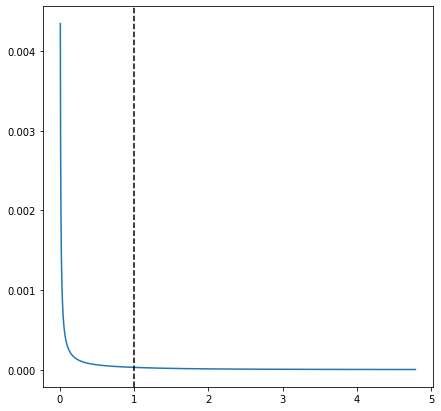

In [871]:
figure,ax=plt.subplots(1)
ax.plot(Temp/Tk,Chi[:,0])
ax.axvline(x=1,linestyle='--',color='k')

In [699]:
#Free energy at zero magnetic field
F0=np.zeros(len(Temp))
for i in range(len(Temp)):
    T=Temp[i]
    Ekren=Ekbare+Sigma
    F0[i]=2*np.sum(np.log(np.exp(-Ekren/(T))+1))

In [700]:
C=np.gradient(np.gradient(F0,T)*Temp*Temp,Temp)

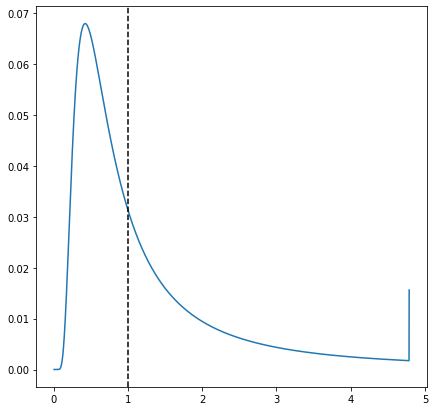

In [708]:
figure,ax=plt.subplots(1)
ax.plot(Temp/Tk,C)
ax.axvline(x=1,linestyle='--',color='k')